The WiDS Datathon 2022 focuses on a prediction task involving roughly 100k observations of building energy usage records collected over 7 years and a number of states within the United States. The dataset consists of building characteristics (e.g. floor area, facility type etc), weather data for the location of the building (e.g. annual average temperature, annual total precipitation etc) as well as the energy usage for the building and the given year, measured as Site Energy Usage Intensity (Site EUI). Each row in the data corresponds to the a single building observed in a given year. Your task is to predict the Site EUI for each row, given the characteristics of the building and the weather data for the location of the building. 

The Target is site_eui (Site Energy Usage Intensity is the amount of heat and electricity consumed by a building as reflected in utility bills).


https://www.kaggle.com/c/widsdatathon2022/data?select=train.csv

#1 - Import and Install libraries

In [ ]:
# Check the versions of libraries

# Python version
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas
print('pandas: {}'.format(pandas.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))

Python: 3.7.12 (default, Jan 15 2022, 18:48:18) 
[GCC 7.5.0]
scipy: 1.4.1
numpy: 1.21.5
matplotlib: 3.2.2
pandas: 1.3.5
sklearn: 1.0.2


In [ ]:
# Loading Libraries
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# Generic
import os
import datetime
import itertools
import warnings
warnings.filterwarnings("ignore")

# visualization
import seaborn as sns
from scipy.stats import norm
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier

## scikit modeling libraries
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier,
                             GradientBoostingClassifier, ExtraTreesClassifier,
                             VotingClassifier)

from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import (GridSearchCV, cross_val_score, cross_val_predict,
                                     StratifiedKFold, learning_curve)

## Load metrics for predictive modeling
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc

In [ ]:
#Preprocessing
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
import pickle
import statsmodels.api as sm
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNetCV
from sklearn import linear_model
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
#PCA libraries
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
import statsmodels.api as sm

In [ ]:
#Ensemble methods
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import ElasticNet, Lasso, Ridge
from sklearn.ensemble import BaggingRegressor, BaggingClassifier
from sklearn.tree import ExtraTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor,GradientBoostingRegressor

In [ ]:
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn import svm
from sklearn.ensemble import ExtraTreesRegressor
from catboost import CatBoostRegressor

In [ ]:
#Kaggle conection
!pip install kaggle --upgrade
!kaggle

# This comand dowload the competition
!kaggle competitions download -c widsdatathon2022

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python2.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python2.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 146, in authenticate
    self.config_file, self.config_dir))
IOError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.
Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python2.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python2.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 146, in authenticate
    self.config_file, self.config_dir))
IOError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [ ]:
!pip install catboost

#2 - Loading Dataset

In [ ]:
path = ("/content/train.csv")
path2 = ("/content/test.csv")

In [ ]:
df = pd.read_csv(path,index_col='id')
dft = pd.read_csv(path2,index_col='id')

In [ ]:
#dft = pd.read_csv(path2,index_col='id')

# 3 - EDA

3.a) Data Overview

In [ ]:
df.tail()

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,february_max_temp,march_min_temp,march_avg_temp,march_max_temp,april_min_temp,april_avg_temp,april_max_temp,may_min_temp,may_avg_temp,may_max_temp,june_min_temp,june_avg_temp,june_max_temp,july_min_temp,july_avg_temp,july_max_temp,august_min_temp,august_avg_temp,august_max_temp,september_min_temp,september_avg_temp,september_max_temp,october_min_temp,october_avg_temp,october_max_temp,november_min_temp,november_avg_temp,november_max_temp,december_min_temp,december_avg_temp,december_max_temp,cooling_degree_days,heating_degree_days,precipitation_inches,snowfall_inches,snowdepth_inches,avg_temp,days_below_30F,days_below_20F,days_below_10F,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
75752,6,State_11,Commercial,Office_Uncategorized,20410.0,1995.0,8.0,36.6,28,43.451613,56,34,47.672414,64,35,49.354839,71,40,56.266667,89,45,59.193548,88,47,63.566667,91,54,66.951613,87,52,68.612903,91,44,61.383333,79,39,55.403226,68,40,51.283333,71,24,38.532258,51,260,3772,45.03,1.4,1,55.147541,6,0,0,0,25,3,0,0,NaN,NaN,NaN,NaN,132.918411
75753,6,State_11,Residential,5plus_Unit_Building,40489.0,1910.0,98.0,36.6,28,43.451613,56,34,47.672414,64,35,49.354839,71,40,56.266667,89,45,59.193548,88,47,63.566667,91,54,66.951613,87,52,68.612903,91,44,61.383333,79,39,55.403226,68,40,51.283333,71,24,38.532258,51,260,3772,45.03,1.4,1,55.147541,6,0,0,0,25,3,0,0,NaN,NaN,NaN,NaN,39.483672
75754,6,State_11,Commercial,Commercial_Other,28072.0,1917.0,NaN,36.6,26,36.612903,48,30,41.637931,58,29,41.338710,62,34,50.183333,79,40,52.145161,79,41,56.233333,86,48,58.758065,81,48,61.612903,87,41,53.783333,73,37,47.661290,59,34,44.650000,62,15,30.338710,46,55,6218,106.32,36.6,438,47.911202,26,2,0,0,6,0,0,0,NaN,NaN,NaN,NaN,48.404398
75755,6,State_11,Commercial,Commercial_Other,53575.0,2012.0,NaN,36.6,26,36.612903,48,30,41.637931,58,29,41.338710,62,34,50.183333,79,40,52.145161,79,41,56.233333,86,48,58.758065,81,48,61.612903,87,41,53.783333,73,37,47.661290,59,34,44.650000,62,15,30.338710,46,55,6218,106.32,36.6,438,47.911202,26,2,0,0,6,0,0,0,NaN,NaN,NaN,NaN,592.022750
75756,6,State_11,Residential,2to4_Unit_Building,23888.0,1974.0,51.0,36.6,27,36.935484,51,29,42.172414,60,30,41.403226,66,36,51.533333,85,41,53.887097,80,41,58.433333,90,48,60.532258,83,49,64.338710,90,43,55.931034,75,40,48.532258,60,31,45.150000,69,18,30.919355,42,148,5853,107.69,28.8,377,49.127397,17,1,0,0,16,0,0,0,NaN,NaN,NaN,NaN,29.154684


In [ ]:
df.describe()

,Year_Factor,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,february_max_temp,march_min_temp,march_avg_temp,march_max_temp,april_min_temp,april_avg_temp,april_max_temp,may_min_temp,may_avg_temp,may_max_temp,june_min_temp,june_avg_temp,june_max_temp,july_min_temp,july_avg_temp,july_max_temp,august_min_temp,august_avg_temp,august_max_temp,september_min_temp,september_avg_temp,september_max_temp,october_min_temp,october_avg_temp,october_max_temp,november_min_temp,november_avg_temp,november_max_temp,december_min_temp,december_avg_temp,december_max_temp,cooling_degree_days,heating_degree_days,precipitation_inches,snowfall_inches,snowdepth_inches,avg_temp,days_below_30F,days_below_20F,days_below_10F,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui
count,75757.000000,7.575700e+04,73920.000000,49048.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,34675.000000,33946.000000,34675.000000,29961.000000,75757.000000
mean,4.367755,1.659839e+05,1952.306764,61.048605,39.506323,11.432343,34.310468,59.054952,11.720567,35.526837,58.486278,21.606281,44.469292,70.897831,32.037171,53.784863,82.661932,44.706179,63.742547,88.987856,51.131763,71.066384,91.400280,60.571604,76.596879,95.543950,58.515068,75.348749,92.572581,50.791689,69.597545,92.171139,38.210911,58.727038,81.135671,28.630397,48.123133,71.202397,22.736777,41.625569,64.496852,1202.250446,4324.957390,42.430651,29.136379,164.862455,56.176705,48.756511,17.447932,4.886532,0.876764,82.709809,14.058701,0.279539,0.002442,66.552675,62.779974,4.190601,109.142051,82.584693
std,1.471441,2.468758e+05,37.053619,28.663683,60.656596,9.381027,6.996108,5.355458,12.577272,8.866697,8.414611,10.004303,6.657142,7.680982,5.577279,2.500473,4.101028,4.200319,2.792919,2.864669,3.415926,2.861681,3.604068,4.177109,4.090275,4.157118,4.441992,3.818895,4.139685,4.290884,3.603773,5.011708,5.093899,2.641300,5.579513,7.153244,4.094207,4.373374,9.014047,5.869386,6.054104,391.561780,824.366727,10.592205,17.810894,175.275869,2.241940,27.587124,14.469435,7.071221,2.894244,25.282913,10.943996,2.252323,0.142140,131.147834,130.308106,6.458789,50.699751,58.255403
min,1.000000,9.430000e+02,0.000000,0.000000,-6.400000,-19.000000,10.806452,42.000000,-13.000000,13.250000,38.000000,-9.000000,25.854839,53.000000,15.000000,40.280000,62.000000,23.000000,46.950000,64.000000,30.000000,54.100000,67.000000,37.000000,54.822581,65.000000,31.000000,56.693548,66.000000,26.000000,53.600000,64.000000,18.000000,44.693548,59.000000,4.000000,30.766667,53.000000,-16.000000,23.790323,42.000000,0.000000,398.000000,0.000000,0.000000,0.000000,44.512329,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,12.000000,1.001169
25%,3.000000,6.237900e+04,1927.000000,40.000000,11.900000,6.000000,29.827586,56.000000,2.000000,31.625000,55.000000,13.000000,38.096774,62.000000,26.000000,52.333333,80.000000,42.000000,62.790323,88.000000,50.000000,70.983333,89.000000,57.000000,76.145161,95.000000,57.000000,74.516129,90.000000,47.000000,68.200000,91.000000,35.000000,58.048387,78.000000,23.000000,45.250000,69.000000,17.000000,38.532258,60.000000,1128.000000,3978.000000,39.350000,9.600000,10.000000,55.147541,22.0

In [ ]:
df.columns

Index(['Year_Factor', 'State_Factor', 'building_class', 'facility_type',
       'floor_area', 'year_built', 'energy_star_rating', 'ELEVATION',
       'january_min_temp', 'january_avg_temp', 'january_max_temp',
       'february_min_temp', 'february_avg_temp', 'february_max_temp',
       'march_min_temp', 'march_avg_temp', 'march_max_temp', 'april_min_temp',
       'april_avg_temp', 'april_max_temp', 'may_min_temp', 'may_avg_temp',
       'may_max_temp', 'june_min_temp', 'june_avg_temp', 'june_max_temp',
       'july_min_temp', 'july_avg_temp', 'july_max_temp', 'august_min_temp',
       'august_avg_temp', 'august_max_temp', 'september_min_temp',
       'september_avg_temp', 'september_max_temp', 'october_min_temp',
       'october_avg_temp', 'october_max_temp', 'november_min_temp',
       'november_avg_temp', 'november_max_temp', 'december_min_temp',
       'december_avg_temp', 'december_max_temp', 'cooling_degree_days',
       'heating_degree_days', 'precipitation_inches', 'snowfall_inc

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75757 entries, 0 to 75756
Data columns (total 63 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year_Factor                75757 non-null  int64  
 1   State_Factor               75757 non-null  object 
 2   building_class             75757 non-null  object 
 3   facility_type              75757 non-null  object 
 4   floor_area                 75757 non-null  float64
 5   year_built                 73920 non-null  float64
 6   energy_star_rating         49048 non-null  float64
 7   ELEVATION                  75757 non-null  float64
 8   january_min_temp           75757 non-null  int64  
 9   january_avg_temp           75757 non-null  float64
 10  january_max_temp           75757 non-null  int64  
 11  february_min_temp          75757 non-null  int64  
 12  february_avg_temp          75757 non-null  float64
 13  february_max_temp          75757 non-null  int

In [ ]:
#Determination of shape and size of df
print(df.shape,dft.shape) #(75757,64)
print(df.size,dft.size)  # 4848448

(75757, 63) (9705, 62)
4772691 601710


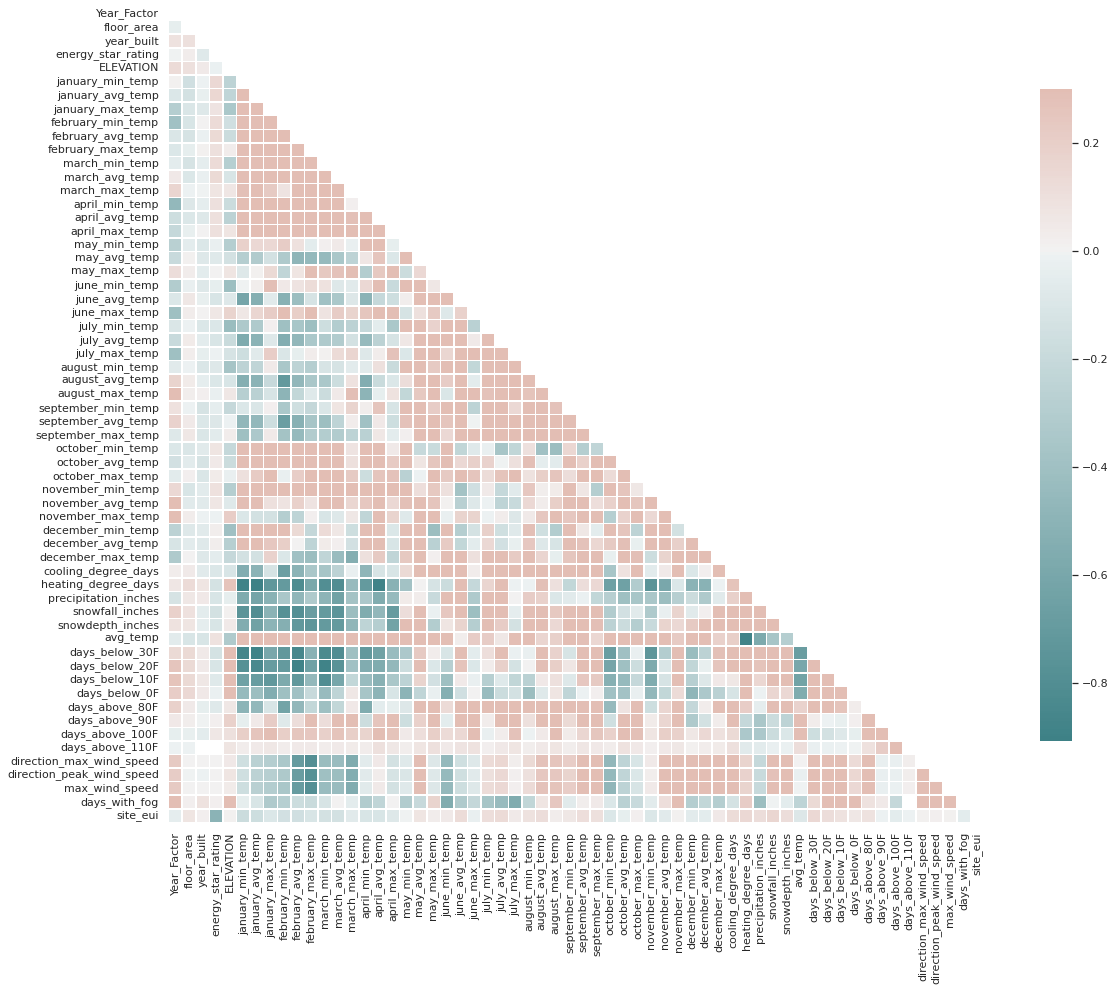

In [ ]:
# Correlation between variables
sns.set_theme(style='white')
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(20, 15))
cmap = sns.diverging_palette(200, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={'shrink': 0.8});

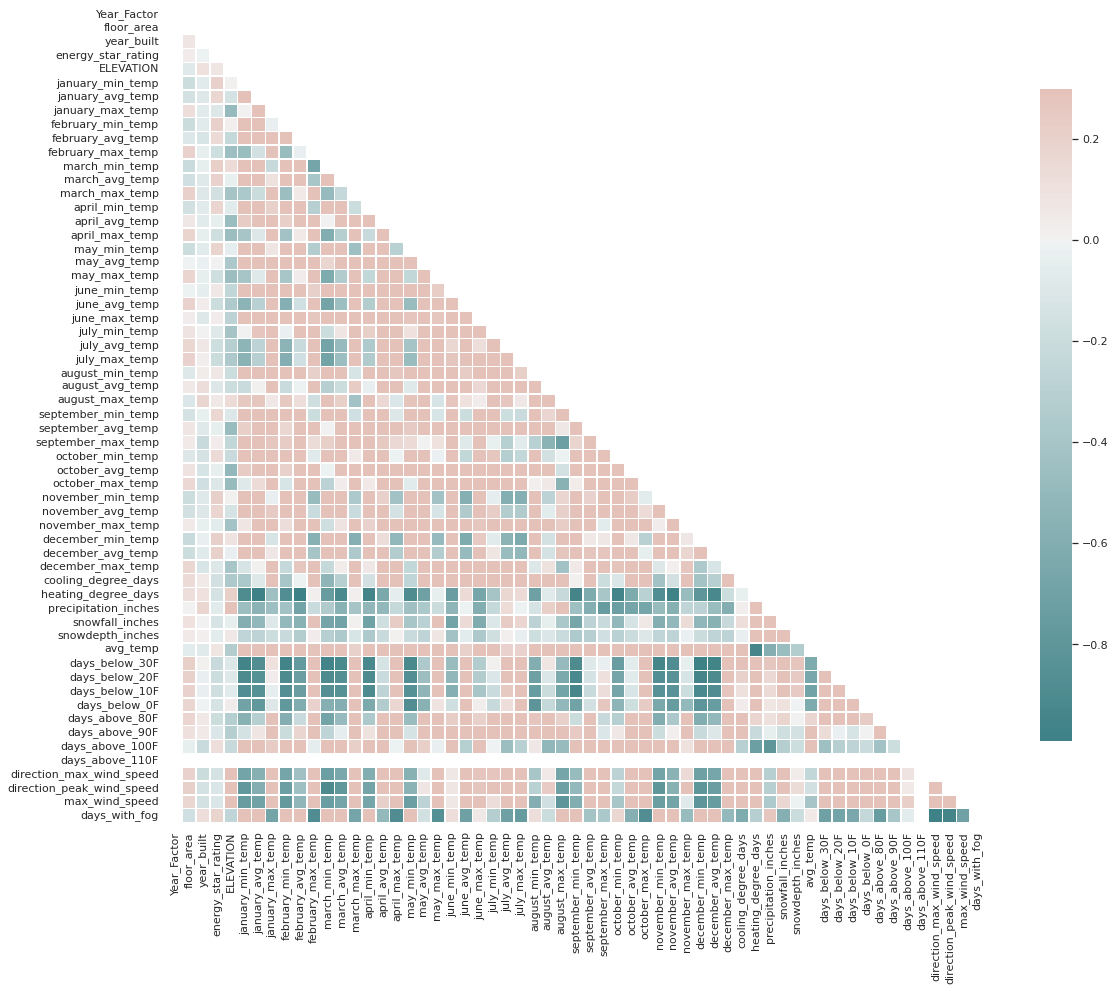

In [ ]:
# Correlation between variables
sns.set_theme(style='white')
corr = dft.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(20, 15))
cmap = sns.diverging_palette(200, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={'shrink': 0.8});

3.b) Exploring Nan

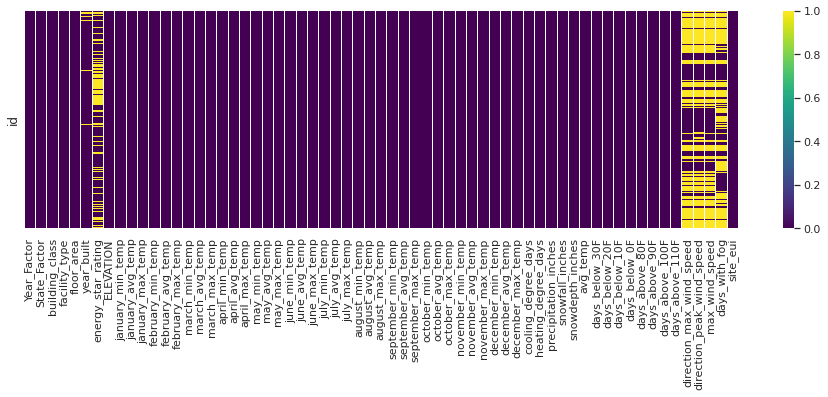

In [ ]:
#Visualization of missing values in DataFrame
fig, ax = plt.subplots(figsize=(16,4))
sns.heatmap(df.isnull(),yticklabels=False,cmap="viridis");

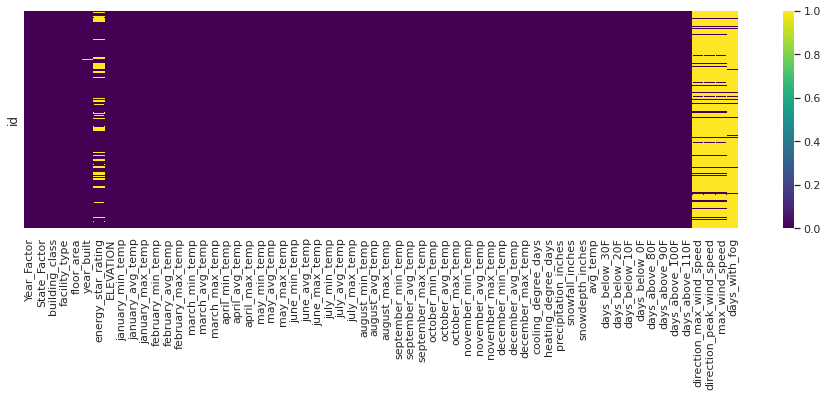

In [ ]:
#Visualization of missing values in DataFrame
fig, ax = plt.subplots(figsize=(16,4))
sns.heatmap(dft.isnull(),yticklabels=False,cmap="viridis");

In [ ]:
#Identify Nan
def null_rate(x):
  null_count = x.isnull().sum()
  null_percentage = round((x.isnull().sum()/x.shape[0])*100, 2)
  null_df = pd.DataFrame({'column_name' : x.columns,'null_count' : null_count,'null_percentage': null_percentage})
  null_df.reset_index(drop = True, inplace = True)
  null_df = null_df[null_df.null_percentage > 0].sort_values(by = 'null_percentage', ascending = False)
  null_columns = [null_df.column_name]
  return null_df, null_columns

In [ ]:
#Cheking nans in DF
exec(f'null_df,null_columns = null_rate(df)')
null_df

,column_name,null_count,null_percentage
61,days_with_fog,45796,60.45
59,direction_peak_wind_speed,41811,55.19
58,direction_max_wind_speed,41082,54.23
60,max_wind_speed,41082,54.23
6,energy_star_rating,26709,35.26
5,year_built,1837,2.42


In [ ]:
#Check Nans in test set
exec(f'null_dft,null_columns = null_rate(dft)')
null_dft

,column_name,null_count,null_percentage
61,days_with_fog,9117,93.94
58,direction_max_wind_speed,8575,88.36
59,direction_peak_wind_speed,8575,88.36
60,max_wind_speed,8575,88.36
6,energy_star_rating,2254,23.23
5,year_built,92,0.95


Both sets have the same Nans columns

Columns with Nans:


*   energy_star_rating
*   year_built
*   max_wind_speed
*   direction_max_wind_speed
*   direction_peak_wind_speed
*   days_with_fog











3.c) Droping Columns with a significant volum of Nans

In [ ]:
#Drop columns with ore than 20% of Nans and input existent values in others
for n,p in zip(null_df.column_name,null_df.null_percentage):
  if p > 40:
    df = df.drop(columns=n)

In [ ]:
#Drop columns with ore than 20% of Nans and input existent values in others
for n,p in zip(null_df.column_name,null_df.null_percentage):
  if p > 40:
    dft = dft.drop(columns=n)

3.d) Identify Categoricals

In [ ]:
#Identify categorical
num_cols = df._get_numeric_data().columns
categoricals = df.drop(columns=num_cols)
categoricals

,State_Factor,building_class,facility_type
id,,,
0,State_1,Commercial,Grocery_store_or_food_market
1,State_1,Commercial,Warehouse_Distribution_or_Shipping_center
2,State_1,Commercial,Retail_Enclosed_mall
3,State_1,Commercial,Education_Other_classroom
4,State_1,Commercial,Warehouse_Nonrefrigerated
...,...,...,...
75752,State_11,Commercial,Office_Uncategorized
75753,State_11,Residential,5plus_Unit_Building
75754,State_11,Commercial,Commercial_Other


In [ ]:
#Identify categorical
num_colst = dft._get_numeric_data().columns
categoricalst = dft.drop(columns=num_colst)
categoricalst

,State_Factor,building_class,facility_type
id,,,
75757,State_1,Commercial,Grocery_store_or_food_market
75758,State_1,Commercial,Grocery_store_or_food_market
75759,State_1,Commercial,Grocery_store_or_food_market
75760,State_1,Commercial,Grocery_store_or_food_market
75761,State_1,Commercial,Grocery_store_or_food_market
...,...,...,...
85457,State_11,Residential,5plus_Unit_Building
85458,State_11,Residential,5plus_Unit_Building
85459,State_11,Residential,5plus_Unit_Building


3.e) Normalize and KKN imputation of missing values

In [ ]:
#Nan imputation using KKNImputer
imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
scaler = MinMaxScaler()

In [ ]:
#Normalize and input

#Create only numerical df to normalize
df_num = df.drop(categoricals,axis=1)

#Normalize 
#df_num = pd.DataFrame(scaler.fit_transform(df_num), columns = df_num.columns)

#KNN impute
df_num = pd.DataFrame(imputer.fit_transform(df_num),columns = df_num.columns)

#Concatenate categorical and numericals
df = pd.concat([categoricals,df_num],axis=1)


In [ ]:
df

,State_Factor,building_class,facility_type,Year_Factor,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,february_max_temp,march_min_temp,march_avg_temp,march_max_temp,april_min_temp,april_avg_temp,april_max_temp,may_min_temp,may_avg_temp,may_max_temp,june_min_temp,june_avg_temp,june_max_temp,july_min_temp,july_avg_temp,july_max_temp,august_min_temp,august_avg_temp,august_max_temp,september_min_temp,september_avg_temp,september_max_temp,october_min_temp,october_avg_temp,october_max_temp,november_min_temp,november_avg_temp,november_max_temp,december_min_temp,december_avg_temp,december_max_temp,cooling_degree_days,heating_degree_days,precipitation_inches,snowfall_inches,snowdepth_inches,avg_temp,days_below_30F,days_below_20F,days_below_10F,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,site_eui
0,State_1,Commercial,Grocery_store_or_food_market,1.0,61242.0,1942.0,11.0,2.4,36.0,50.500000,68.0,35.0,50.589286,73.0,40.0,53.693548,80.0,41.0,55.500000,78.0,46.0,56.854839,84.0,50.0,60.500000,90.0,52.0,62.725806,84.0,52.0,62.161290,85.0,52.0,64.650000,90.0,47.0,63.016129,83.0,43.0,53.800000,72.0,36.0,49.274194,71.0,115.0,2960.0,16.59,0.0,0.0,56.972603,0.0,0.0,0.0,0.0,14.0,0.0,0.0,0.0,248.682615
1,State_1,Commercial,Warehouse_Distribution_or_Shipping_center,1.0,274000.0,1955.0,45.0,1.8,36.0,50.500000,68.0,35.0,50.589286,73.0,40.0,53.693548,80.0,41.0,55.500000,78.0,46.0,56.854839,84.0,50.0,60.500000,90.0,52.0,62.725806,84.0,52.0,62.161290,85.0,52.0,64.650000,90.0,47.0,63.016129,83.0,43.0,53.800000,72.0,36.0,49.274194,71.0,115.0,2960.0,16.59,0.0,0.0,56.972603,0.0,0.0,0.0,0.0,14.0,0.0,0.0,0.0,26.500150
2,State_1,Commercial,Retail_Enclosed_mall,1.0,280025.0,1951.0,97.0,1.8,36.0,50.500000,68.0,35.0,50.589286,73.0,40.0,53.693548,80.0,41.0,55.500000,78.0,46.0,56.854839,84.0,50.0,60.500000,90.0,52.0,62.725806,84.0,52.0,62.161290,85.0,52.0,64.650000,90.0,47.0,63.016129,83.0,43.0,53.800000,72.0,36.0,49.274194,71.0,115.0,2960.0,16.59,0.0,0.0,56.972603,0.0,0.0,0.0,0.0,14.0,0.0,0.0,0.0,24.693619
3,State_1,Commercial,Education_Other_classroom,1.0,55325.0,1980.0,46.0,1.8,36.0,50.500000,68.0,35.0,50.589286,73.0,40.0,53.693548,80.0,41.0,55.500000,78.0,46.0,56.854839,84.0,50.0,60.500000,90.0,52.0,62.725806,84.0,52.0,62.161290,85.0,52.0,64.650000,90.0,47.0,63.016129,83.0,43.0,53.800000,72.0,36.0,49.274194,71.0,115.0,2960.0,16.59,0.0,0.0,56.972603,0.0,0.0,0.0,0.0,14.0,0.0,0.0,0.0,48.406926
4,State_1,Commercial,Warehouse_Nonrefrigerated,1.0,66000.0,1985.0,100.0,2.4,36.0,50.500000,68.0,35.0,50.589286,73.0,40.0,53.693548,80.0,41.0,55.500000,78.0,46.0,56.854839,84.0,50.0,60.500000,90.0,52.0,62.725806,84.0,52.0,62.161290,85.0,52.0,64.650000,90.0,47.0,63.016129,83.0,43.0,53.800000,72.0,36.0,49.274194,71.0,115.0,2960.0,16.59,0.0,0.0,56.972603,0.0,0.0,0.0,0.0,14.0,0.0,0.0,0.0,3.899395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75752,State_11,Commercial,Office_Uncategorized,6.0,20410.0,1995.0,8.0,36.6,28.0,43.451613,56.0,34.0,47.672414,64.0,35.0,49.354839,71.0,40.0,56.266667,89.0,45.0,59.193548,88.0,47.0,63.566667,91.0,54.0,66.951613,87.0,52.0,68.612903,91.0,44.0,61.383333,79.0,39.0,55.403226,68.0,40.0,51.283333,71.0,24.0,38.532258,51.0,260.0,3772.0,45.03,1.4,1.0,55.147541,6.0,0.0,0.0,0.0,25.0,3.0,0.0,0.0,132.918411
75753,State_11,Residential,5plus_Unit_Building,6.0,40489.0,1910.0,98.0,36.6,28.0,43.451613,56.0,34.0,47.672414,64.0,35.0,49.354839,71.0,40.0,56.266667,89.0,45.0,59.193548,88.0,47.0,63.566667,91.0,54.0,66.951613,87.0,52.0,68.612903,91.0,44.0,61.383333,79.0,39.0,55.403226,68.0,40.0,51.283333,71.0,24.0,38.532258,51.0,260.0,3772.0,45.03,1.4,1.0,55.147541,6.0,0.0,0.0,0.0,25.0,3.0,0.0,0.0,39.483672
75754,State_11,Commercial,Commercial_Other,6.0,28072.0,

In [ ]:
#Normalize and input

#Create only numerical df to normalize
df_numt = dft._get_numeric_data()

#Normalize 
#df_numt = pd.DataFrame(scaler.fit_transform(df_numt), columns = df_numt.columns,index=dft.index)

#KNN impute
df_numt = pd.DataFrame(imputer.fit_transform(df_numt),columns = df_numt.columns,index=dft.index)

#Concatenate categorical and numericals
dft = pd.concat([categoricalst,df_numt],axis=1)



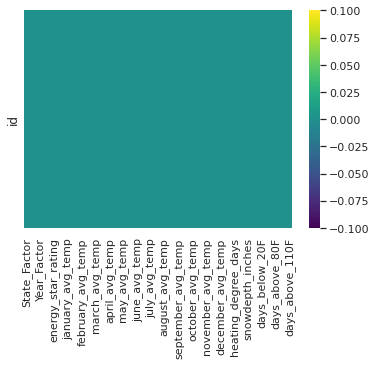

In [ ]:
#Checking nan imputation
sns.heatmap(dft.isnull(),yticklabels=False,cmap="viridis");

In [ ]:
#Save df after EDA for future modeling
df.to_pickle("/content/Modelar_EDA.pkl") 

2.f) Outlier detection

In [ ]:
# Create a DataFrame only with original numercials features
df_out = df.drop(categoricals,axis=1)

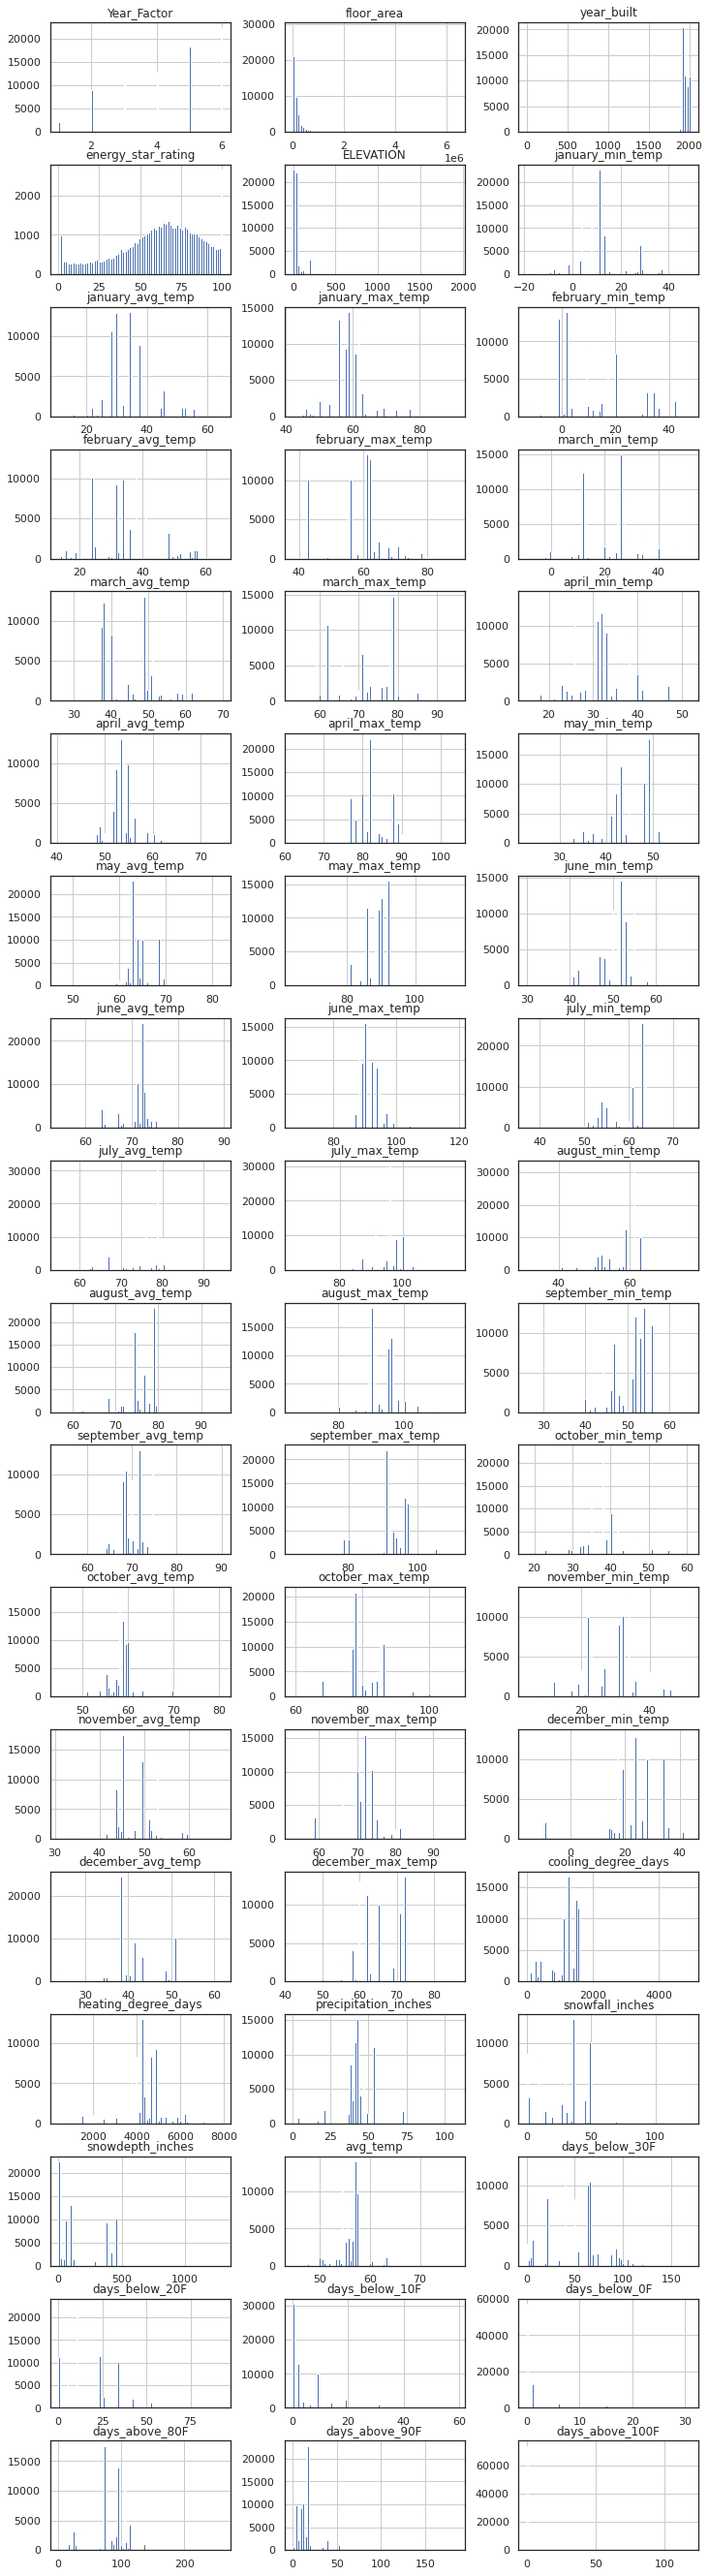

In [ ]:
#Histogram of numerical features.Cheking the distribution of features (gaussian,normal,...) 
fig, axes = plt.subplots(len(df_out.columns)//3, 3, figsize=(12, 48))

i = 0
for triaxis in axes:
    for axis in triaxis:
        df_out.hist(column = df_out.columns[i], bins = 100, ax=axis)
        i = i+1
  

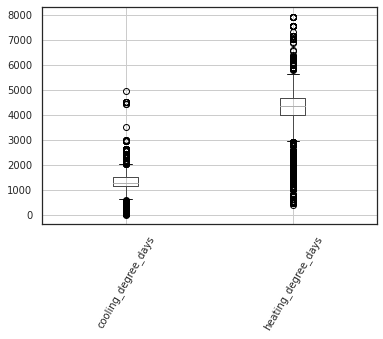

In [ ]:
df_out.boxplot(column =['cooling_degree_days','heating_degree_days'],rot=60,fontsize=10);

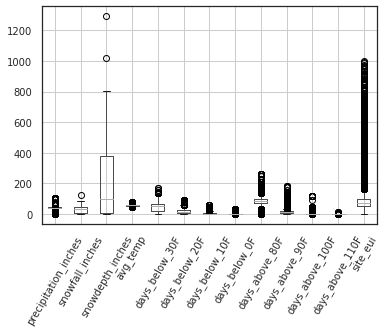

In [ ]:
df_out.boxplot(column =[
      'precipitation_inches', 'snowfall_inches',
       'snowdepth_inches', 'avg_temp', 'days_below_30F', 'days_below_20F',
       'days_below_10F', 'days_below_0F', 'days_above_80F', 'days_above_90F',
       'days_above_100F', 'days_above_110F',
       'site_eui'],rot=60,fontsize=10);

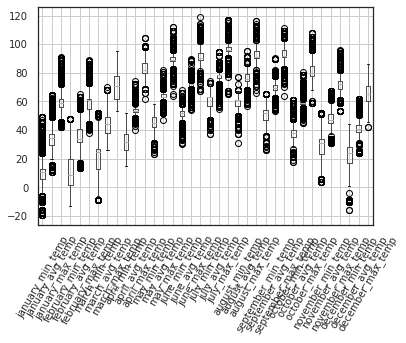

In [ ]:
df_out.boxplot(column =[
       'january_min_temp', 'january_avg_temp', 'january_max_temp',
       'february_min_temp', 'february_avg_temp', 'february_max_temp',
       'march_min_temp', 'march_avg_temp', 'march_max_temp', 'april_min_temp',
       'april_avg_temp', 'april_max_temp', 'may_min_temp', 'may_avg_temp',
       'may_max_temp', 'june_min_temp', 'june_avg_temp', 'june_max_temp',
       'july_min_temp', 'july_avg_temp', 'july_max_temp', 'august_min_temp',
       'august_avg_temp', 'august_max_temp', 'september_min_temp',
       'september_avg_temp', 'september_max_temp', 'october_min_temp',
       'october_avg_temp', 'october_max_temp', 'november_min_temp',
       'november_avg_temp', 'november_max_temp', 'december_min_temp',
       'december_avg_temp', 'december_max_temp'],rot=60,fontsize=10);

2.g) Pair Plots Representation

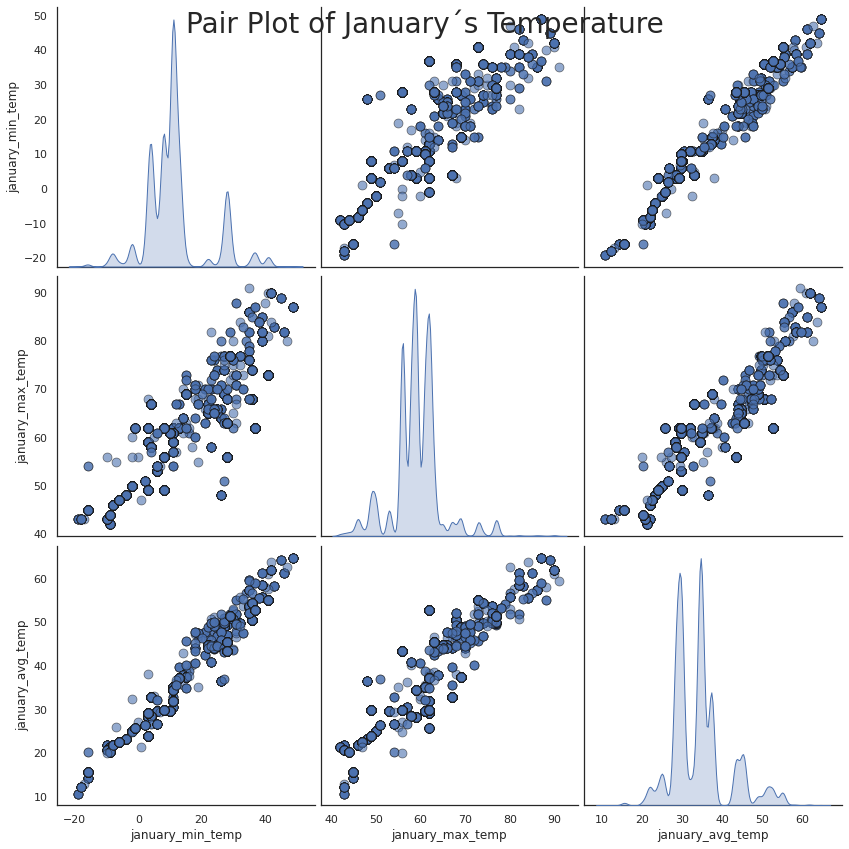

In [ ]:
# Pair Plot by month
sns.pairplot(df_out, 
             vars = ['january_min_temp', 'january_max_temp', 'january_avg_temp'], 
             diag_kind = 'kde', 
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             size = 4);# Title 
plt.suptitle('Pair Plot of January´s Temperature', 
             size = 28);

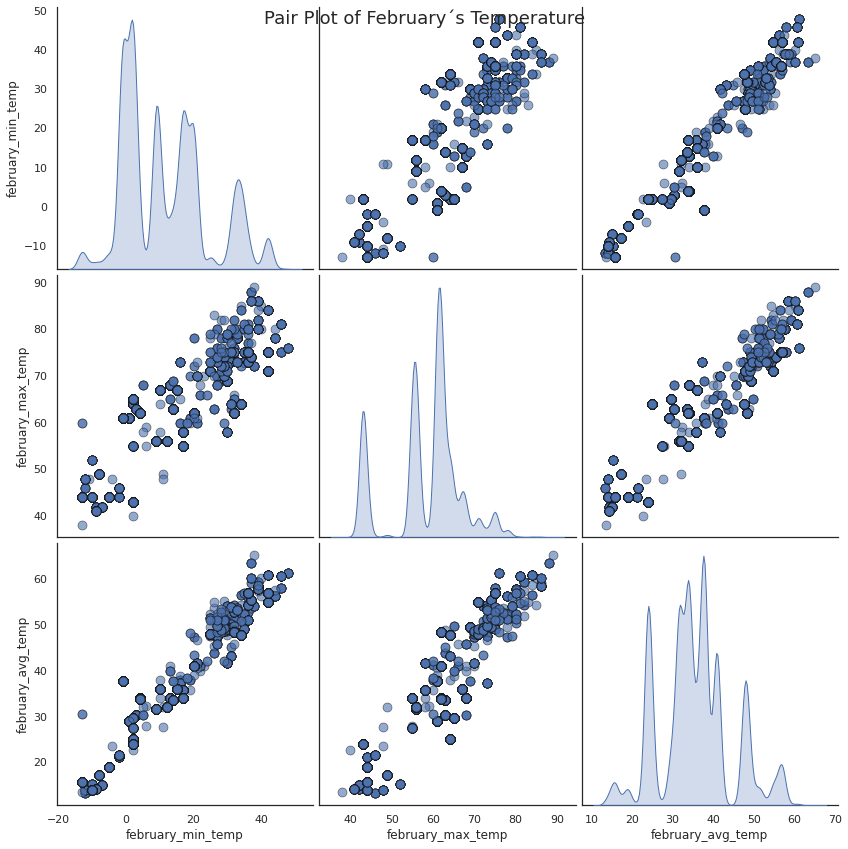

In [ ]:
# Pair Plot by month
sns.pairplot(df_out, 
             vars = ['february_min_temp', 'february_max_temp', 'february_avg_temp'], 
             diag_kind = 'kde', 
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             size = 4);# Title 
plt.suptitle('Pair Plot of February´s Temperature', 
             size = 18);

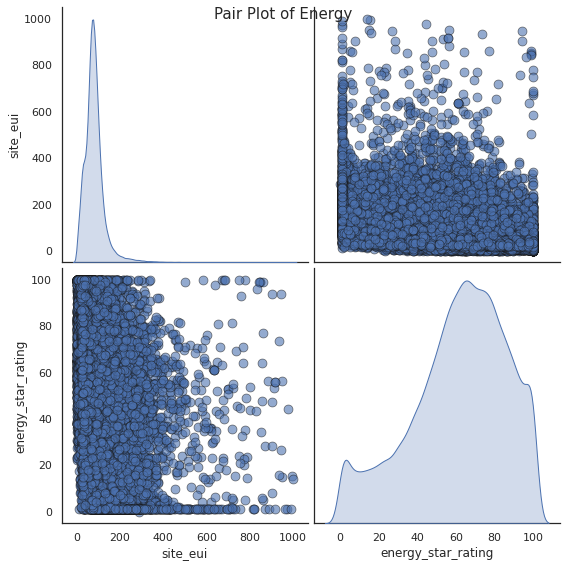

In [ ]:
# Pair Plot by energy variables
sns.pairplot(df_out, 
             vars = ['site_eui', 'energy_star_rating'], 
             diag_kind = 'kde', 
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             size = 4);# Title 
plt.suptitle('Pair Plot of Energy', 
             size = 15);

In [ ]:
# Pair Plot by below and above temperatures (4 minutes)
sns.pairplot(df_out, 
             vars = ['days_below_30F', 'days_below_20F','days_below_10F','days_below_0F','days_above_80F','days_above_90F','days_above_100F','days_above_110F'], 
             diag_kind = 'kde', 
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             size = 4);# Title 
plt.suptitle('Pair Plot of Energy', 
             size = 15);

KeyboardInterrupt: ignored

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f90e6e555f0> (for post_execute):


KeyboardInterrupt: ignored

Error in callback <function flush_figures at 0x7f90e6e5b0e0> (for post_execute):


KeyboardInterrupt: ignored

In [ ]:
print(df.State_Factor.unique())
print(df.building_class.unique())

['State_1' 'State_2' 'State_4' 'State_6' 'State_8' 'State_10' 'State_11']
['Commercial' 'Residential']


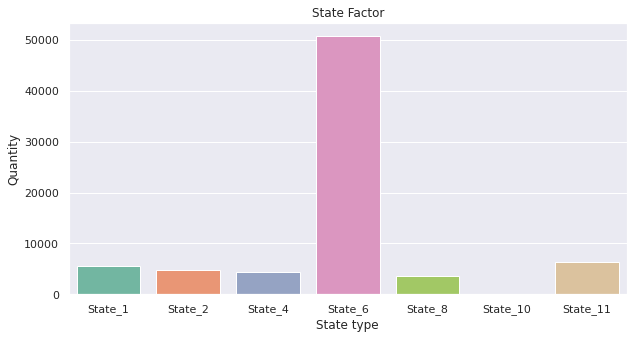

In [ ]:
plt.figure(figsize=(10,5))  
sns.set(style = "darkgrid")
ax = sns.countplot (x ="State_Factor" , data = df, palette = "Set2")
plt.title("State Factor")
plt.xlabel('State type')
plt.ylabel('Quantity')
plt.show()

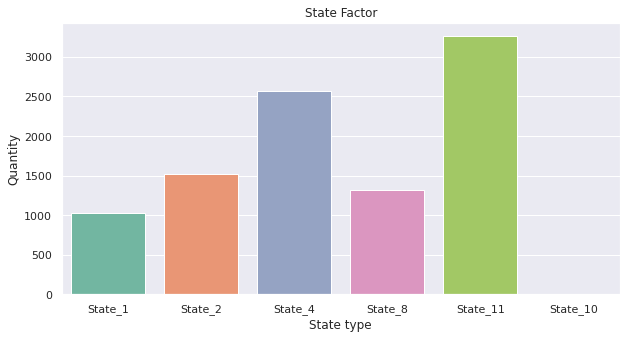

In [ ]:
plt.figure(figsize=(10,5))  
sns.set(style = "darkgrid")
ax = sns.countplot (x ="State_Factor" , data = dft, palette = "Set2")
plt.title("State Factor")
plt.xlabel('State type')
plt.ylabel('Quantity')
plt.show()

In [ ]:
print("Clases: ", df['State_Factor'].unique())
for c in df['State_Factor'].unique():
    print(f"The ratio from example {c} is {(sum(df['State_Factor']==c) / df.shape[0]):.2f}")

Clases:  ['State_1' 'State_2' 'State_4' 'State_6' 'State_8' 'State_10' 'State_11']
The ratio from example State_1 is 0.07
The ratio from example State_2 is 0.06
The ratio from example State_4 is 0.06
The ratio from example State_6 is 0.67
The ratio from example State_8 is 0.05
The ratio from example State_10 is 0.00
The ratio from example State_11 is 0.08


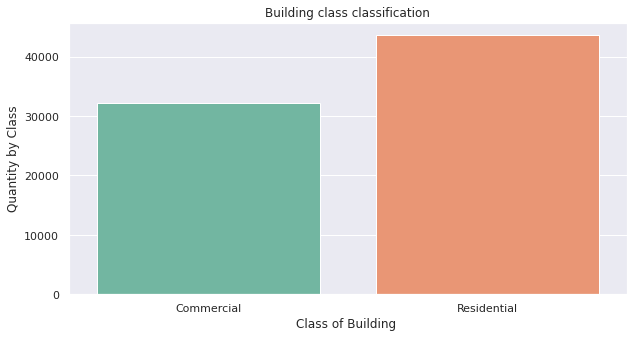

In [ ]:
plt.figure(figsize=(10,5))  
sns.set(style = "darkgrid")
ax = sns.countplot (x ="building_class" , data = df, palette = "Set2")
plt.title("Building class classification")
plt.xlabel('Class of Building ')
plt.ylabel('Quantity by Class')
plt.show()

In [ ]:
print("Class: ", df['building_class'].unique())
for c in df['building_class'].unique():
    print(f"The ratio of example {c} is {(sum(df['building_class']==c) / df.shape[0]):.2f}")

Class:  ['Commercial' 'Residential']
The ratio of example Commercial is 0.43
The ratio of example Residential is 0.57


In [ ]:
df.facility_type.unique()

array(['Grocery_store_or_food_market',
       'Warehouse_Distribution_or_Shipping_center',
       'Retail_Enclosed_mall', 'Education_Other_classroom',
       'Warehouse_Nonrefrigerated', 'Warehouse_Selfstorage',
       'Office_Uncategorized', 'Data_Center', 'Commercial_Other',
       'Mixed_Use_Predominantly_Commercial',
       'Office_Medical_non_diagnostic', 'Education_College_or_university',
       'Industrial', 'Laboratory',
       'Public_Assembly_Entertainment_culture',
       'Retail_Vehicle_dealership_showroom', 'Retail_Uncategorized',
       'Lodging_Hotel', 'Retail_Strip_shopping_mall',
       'Education_Uncategorized', 'Health_Care_Inpatient',
       'Public_Assembly_Drama_theater', 'Public_Assembly_Social_meeting',
       'Religious_worship', 'Mixed_Use_Commercial_and_Residential',
       'Office_Bank_or_other_financial', 'Parking_Garage',
       'Commercial_Unknown', 'Service_Vehicle_service_repair_shop',
       'Service_Drycleaning_or_Laundry', 'Public_Assembly_Recreation

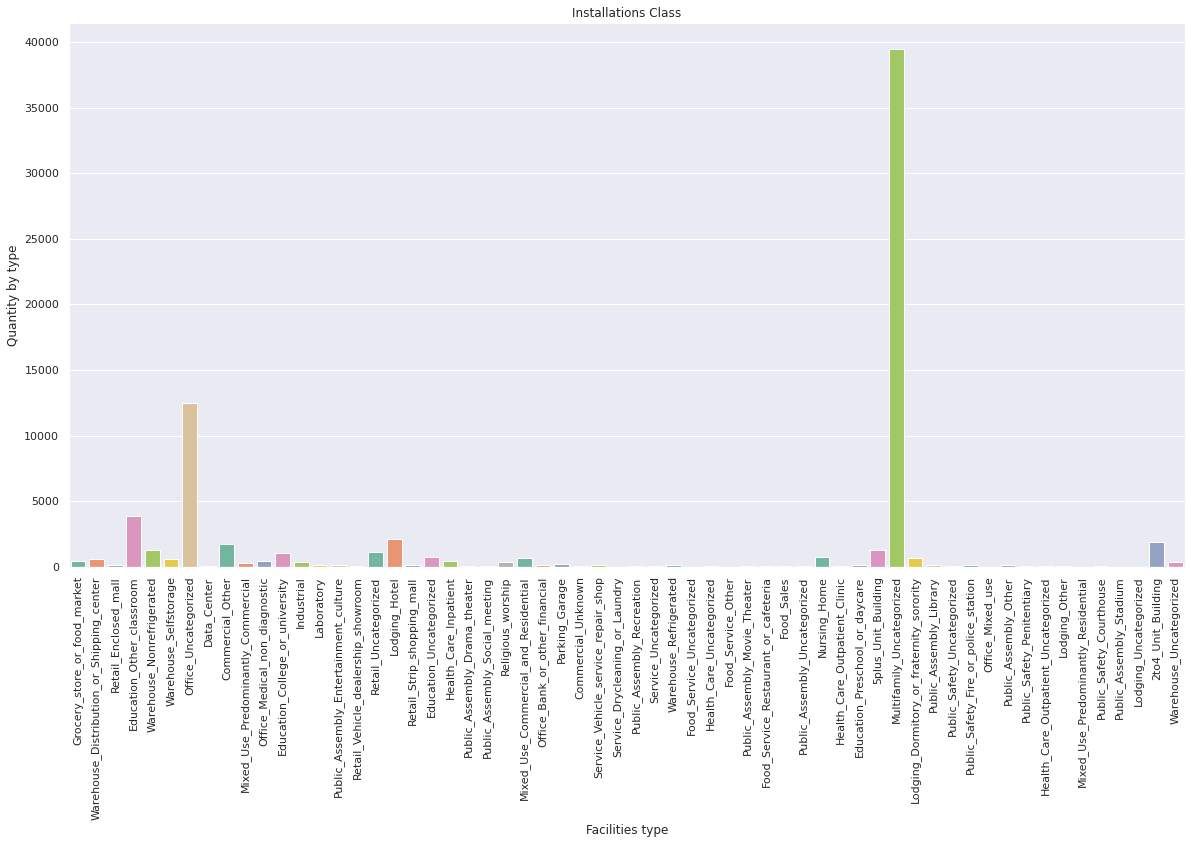

In [ ]:
plt.figure(figsize=(20,10))  #Hay una clase mayoritaria (la 27)
sns.set(style = "darkgrid")
ax = sns.countplot (x ="facility_type" , data = df, palette = "Set2")
plt.title("Installations Class")
plt.xlabel('Facilities type')
plt.ylabel('Quantity by type')
plt.xticks(rotation=90)
plt.show()

3.h) Label Encoder Categorical features

In [ ]:
lbe = LabelEncoder()

In [ ]:
#Apply Label Encoder in categorical
categoricals = categoricals.apply(LabelEncoder().fit_transform)

In [ ]:
#Concatenate Categorial applied label encode
df = df.drop(columns=categoricals)
df = pd.concat([categoricals, df],axis=1)
df.head(5)

,State_Factor,building_class,facility_type,Year_Factor,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,february_max_temp,march_min_temp,march_avg_temp,march_max_temp,april_min_temp,april_avg_temp,april_max_temp,may_min_temp,may_avg_temp,may_max_temp,june_min_temp,june_avg_temp,june_max_temp,july_min_temp,july_avg_temp,july_max_temp,august_min_temp,august_avg_temp,august_max_temp,september_min_temp,september_avg_temp,september_max_temp,october_min_temp,october_avg_temp,october_max_temp,november_min_temp,november_avg_temp,november_max_temp,december_min_temp,december_avg_temp,december_max_temp,cooling_degree_days,heating_degree_days,precipitation_inches,snowfall_inches,snowdepth_inches,avg_temp,days_below_30F,days_below_20F,days_below_10F,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,site_eui
0,0,0,13,1.0,61242.0,1942.0,11.0,2.4,36.0,50.5,68.0,35.0,50.589286,73.0,40.0,53.693548,80.0,41.0,55.5,78.0,46.0,56.854839,84.0,50.0,60.5,90.0,52.0,62.725806,84.0,52.0,62.16129,85.0,52.0,64.65,90.0,47.0,63.016129,83.0,43.0,53.8,72.0,36.0,49.274194,71.0,115.0,2960.0,16.59,0.0,0.0,56.972603,0.0,0.0,0.0,0.0,14.0,0.0,0.0,0.0,248.682615
1,0,0,55,1.0,274000.0,1955.0,45.0,1.8,36.0,50.5,68.0,35.0,50.589286,73.0,40.0,53.693548,80.0,41.0,55.5,78.0,46.0,56.854839,84.0,50.0,60.5,90.0,52.0,62.725806,84.0,52.0,62.16129,85.0,52.0,64.65,90.0,47.0,63.016129,83.0,43.0,53.8,72.0,36.0,49.274194,71.0,115.0,2960.0,16.59,0.0,0.0,56.972603,0.0,0.0,0.0,0.0,14.0,0.0,0.0,0.0,26.500150
2,0,0,48,1.0,280025.0,1951.0,97.0,1.8,36.0,50.5,68.0,35.0,50.589286,73.0,40.0,53.693548,80.0,41.0,55.5,78.0,46.0,56.854839,84.0,50.0,60.5,90.0,52.0,62.725806,84.0,52.0,62.16129,85.0,52.0,64.65,90.0,47.0,63.016129,83.0,43.0,53.8,72.0,36.0,49.274194,71.0,115.0,2960.0,16.59,0.0,0.0,56.972603,0.0,0.0,0.0,0.0,14.0,0.0,0.0,0.0,24.693619
3,0,0,6,1.0,55325.0,1980.0,46.0,1.8,36.0,50.5,68.0,35.0,50.589286,73.0,40.0,53.693548,80.0,41.0,55.5,78.0,46.0,56.854839,84.0,50.0,60.5,90.0,52.0,62.725806,84.0,52.0,62.16129,85.0,52.0,64.65,90.0,47.0,63.016129,83.0,43.0,53.8,72.0,36.0,49.274194,71.0,115.0,2960.0,16.59,0.0,0.0,56.972603,0.0,0.0,0.0,0.0,14.0,0.0,0.0,0.0,48.406926
4,0,0,56,1.0,66000.0,1985.0,100.0,2.4,36.0,50.5,68.0,35.0,50.589286,73.0,40.0,53.693548,80.0,41.0,55.5,78.0,46.0,56.854839,84.0,50.0,60.5,90.0,52.0,62.725806,84.0,52.0,62.16129,85.0,52.0,64.65,90.0,47.0,63.016129,83.0,43.0,53.8,72.0,36.0,49.274194,71.0,115.0,2960.0,16.59,0.0,0.0,56.972603,0.0,0.0,0.0,0.0,14.0,0.0,0.0,0.0,3.899395


In [ ]:
#Apply Label Encoder in categorical
categoricalst = categoricalst.apply(LabelEncoder().fit_transform)

#Concatenate Categorial applied label encode
dft = dft.drop(columns=categoricalst)
dft = pd.concat([categoricalst, dft],axis=1)
dft.head(5)

,State_Factor,building_class,facility_type,Year_Factor,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,february_max_temp,march_min_temp,march_avg_temp,march_max_temp,april_min_temp,april_avg_temp,april_max_temp,may_min_temp,may_avg_temp,may_max_temp,june_min_temp,june_avg_temp,june_max_temp,july_min_temp,july_avg_temp,july_max_temp,august_min_temp,august_avg_temp,august_max_temp,september_min_temp,september_avg_temp,september_max_temp,october_min_temp,october_avg_temp,october_max_temp,november_min_temp,november_avg_temp,november_max_temp,december_min_temp,december_avg_temp,december_max_temp,cooling_degree_days,heating_degree_days,precipitation_inches,snowfall_inches,snowdepth_inches,avg_temp,days_below_30F,days_below_20F,days_below_10F,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
75757,0,0,13,7.0,28484.0,1994.0,37.0,2.4,38.0,50.596774,64.0,40.0,54.482143,66.0,42.0,56.935484,77.0,45.0,58.45,78.0,49.0,60.903226,87.0,51.0,63.15,97.0,53.0,64.258065,85.0,53.0,65.854839,88.0,54.0,69.766667,104.0,48.0,64.193548,91.0,43.0,58.05,69.0,38.0,51.887097,66.0,342.0,2112.0,25.24,0.0,0.0,59.894521,0.0,0.0,0.0,0.0,29.0,5.0,2.0,0.0
75758,0,0,13,7.0,21906.0,1961.0,55.0,45.7,38.0,50.596774,64.0,40.0,54.482143,66.0,42.0,56.935484,77.0,45.0,58.45,78.0,49.0,60.903226,87.0,51.0,63.15,97.0,53.0,64.258065,85.0,53.0,65.854839,88.0,54.0,69.766667,104.0,48.0,64.193548,91.0,43.0,58.05,69.0,38.0,51.887097,66.0,342.0,2112.0,25.24,0.0,0.0,59.894521,0.0,0.0,0.0,0.0,29.0,5.0,2.0,0.0
75759,0,0,13,7.0,16138.0,1950.0,1.0,59.1,38.0,50.596774,64.0,40.0,54.482143,66.0,42.0,56.935484,77.0,45.0,58.45,78.0,49.0,60.903226,87.0,51.0,63.15,97.0,53.0,64.258065,85.0,53.0,65.854839,88.0,54.0,69.766667,104.0,48.0,64.193548,91.0,43.0,58.05,69.0,38.0,51.887097,66.0,342.0,2112.0,25.24,0.0,0.0,59.894521,0.0,0.0,0.0,0.0,29.0,5.0,2.0,0.0
75760,0,0,13,7.0,97422.0,1971.0,34.0,35.4,38.0,50.596774,64.0,40.0,54.482143,66.0,42.0,56.935484,77.0,45.0,58.45,78.0,49.0,60.903226,87.0,51.0,63.15,97.0,53.0,64.258065,85.0,53.0,65.854839,88.0,54.0,69.766667,104.0,48.0,64.193548,91.0,43.0,58.05,69.0,38.0,51.887097,66.0,342.0,2112.0,25.24,0.0,0.0,59.894521,0.0,0.0,0.0,0.0,29.0,5.0,2.0,0.0
75761,0,0,13,7.0,61242.0,1942.0,35.0,1.8,38.0,50.596774,64.0,40.0,54.482143,66.0,42.0,56.935484,77.0,45.0,58.45,78.0,49.0,60.903226,87.0,51.0,63.15,97.0,53.0,64.258065,85.0,53.0,65.854839,88.0,54.0,69.766667,104.0,48.0,64.193548,91.0,43.0,58.05,69.0,38.0,51.887097,66.0,342.0,2112.0,25.24,0.0,0.0,59.894521,0.0,0.0,0.0,0.0,29.0,5.0,2.0,0.0


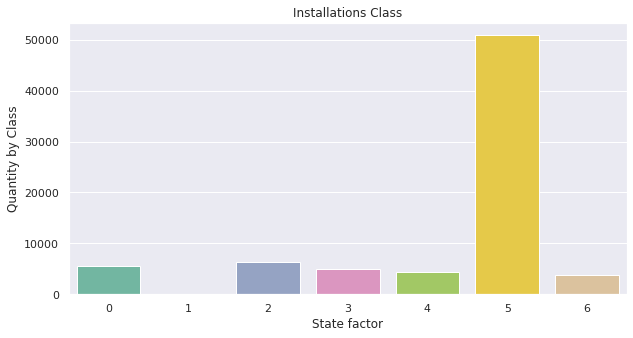

In [ ]:
plt.figure(figsize=(10,5))  
sns.set(style = "darkgrid")
ax = sns.countplot (x ="State_Factor" , data = df, palette = "Set2")
plt.title("Installations Class")
plt.xlabel('State factor')
plt.ylabel('Quantity by Class')
plt.show()

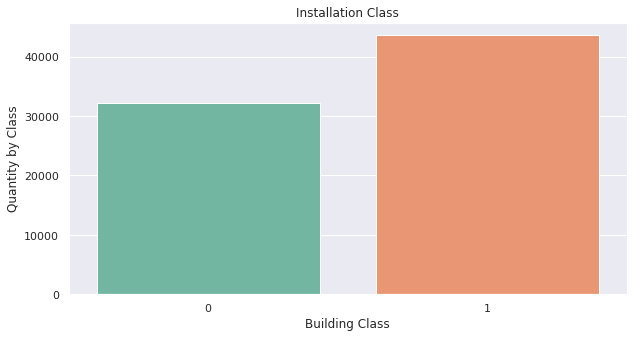

In [ ]:
plt.figure(figsize=(10,5))  #Commercial (0) and residential (1)
sns.set(style = "darkgrid")
ax = sns.countplot (x ="building_class" , data = df, palette = "Set2")
plt.title("Installation Class")
plt.xlabel('Building Class')
plt.ylabel('Quantity by Class')
plt.show()

Feature correlation

In [ ]:
def seleccion_parejas(df):
    parejas=[]
    seleccion_numericas=df.select_dtypes(include="number")
    for i in range(len(df.columns)):
        for j in range(0,i+1):
            parejas.append((df.columns[i],df.columns[j]))
    return parejas

In [ ]:
seleccion_parejas(df)

[('State_Factor', 'State_Factor'),
 ('building_class', 'State_Factor'),
 ('building_class', 'building_class'),
 ('facility_type', 'State_Factor'),
 ('facility_type', 'building_class'),
 ('facility_type', 'facility_type'),
 ('Year_Factor', 'State_Factor'),
 ('Year_Factor', 'building_class'),
 ('Year_Factor', 'facility_type'),
 ('Year_Factor', 'Year_Factor'),
 ('floor_area', 'State_Factor'),
 ('floor_area', 'building_class'),
 ('floor_area', 'facility_type'),
 ('floor_area', 'Year_Factor'),
 ('floor_area', 'floor_area'),
 ('year_built', 'State_Factor'),
 ('year_built', 'building_class'),
 ('year_built', 'facility_type'),
 ('year_built', 'Year_Factor'),
 ('year_built', 'floor_area'),
 ('year_built', 'year_built'),
 ('energy_star_rating', 'State_Factor'),
 ('energy_star_rating', 'building_class'),
 ('energy_star_rating', 'facility_type'),
 ('energy_star_rating', 'Year_Factor'),
 ('energy_star_rating', 'floor_area'),
 ('energy_star_rating', 'year_built'),
 ('energy_star_rating', 'energy_sta

In [ ]:
def correlaciones(df,n=10):
    df=df.select_dtypes(include="number")
    correlacion=df.corr().abs().unstack()
    correlacion=correlacion.drop(labels=seleccion_parejas(df)).sort_values(ascending=False)
    return correlacion[0:n]

In [ ]:
correlaciones(df)

january_min_temp   january_avg_temp       0.971149
august_avg_temp    cooling_degree_days    0.952686
july_avg_temp      cooling_degree_days    0.917971
january_avg_temp   february_avg_temp      0.911228
december_min_temp  december_avg_temp      0.910207
january_avg_temp   march_min_temp         0.907587
                   heating_degree_days    0.907366
days_below_20F     days_below_10F         0.904578
february_avg_temp  march_min_temp         0.900891
days_below_30F     days_below_20F         0.896062
dtype: float64

3.i) Target variable Analysis

In [ ]:
df.site_eui.describe()

count    75757.000000
mean        82.584693
std         58.255403
min          1.001169
25%         54.528601
50%         75.293716
75%         97.277534
max        997.866120
Name: site_eui, dtype: float64

In [ ]:
df.site_eui.mean(axis=0)

82.58469263622104

In [ ]:
df.site_eui.var(axis=0)

3393.6919389865825

3.j) Drop Outliers

In [ ]:
#Eliminating outliers using Z-score
z = np.abs(stats.zscore(df))
dfc = df[(z<3).all(axis=1)]

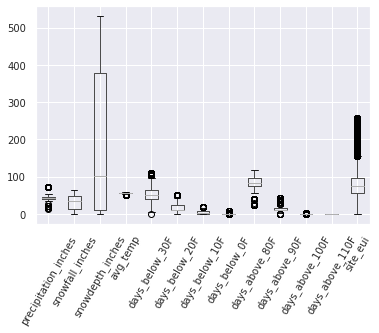

In [ ]:
dfc.boxplot(column =[
      'precipitation_inches', 'snowfall_inches',
       'snowdepth_inches', 'avg_temp', 'days_below_30F', 'days_below_20F',
       'days_below_10F', 'days_below_0F', 'days_above_80F', 'days_above_90F',
       'days_above_100F', 'days_above_110F',
       'site_eui'],rot=60,fontsize=10);

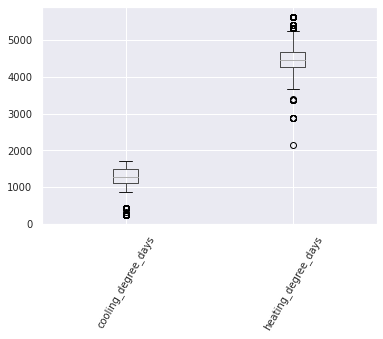

In [ ]:
dfc.boxplot(column =['cooling_degree_days','heating_degree_days'],rot=60,fontsize=10);

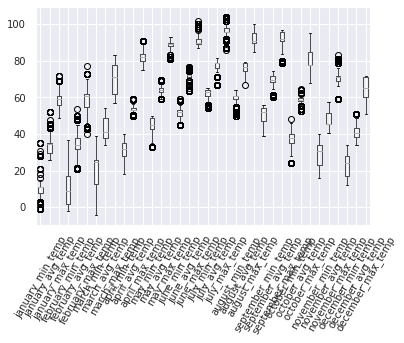

In [ ]:
#Check outliers after apply Z-Score
dfc.boxplot(column =[
       'january_min_temp', 'january_avg_temp', 'january_max_temp',
       'february_min_temp', 'february_avg_temp', 'february_max_temp',
       'march_min_temp', 'march_avg_temp', 'march_max_temp', 'april_min_temp',
       'april_avg_temp', 'april_max_temp', 'may_min_temp', 'may_avg_temp',
       'may_max_temp', 'june_min_temp', 'june_avg_temp', 'june_max_temp',
       'july_min_temp', 'july_avg_temp', 'july_max_temp', 'august_min_temp',
       'august_avg_temp', 'august_max_temp', 'september_min_temp',
       'september_avg_temp', 'september_max_temp', 'october_min_temp',
       'october_avg_temp', 'october_max_temp', 'november_min_temp',
       'november_avg_temp', 'november_max_temp', 'december_min_temp',
       'december_avg_temp', 'december_max_temp'],rot=60,fontsize=10);

#4 - PCA

In [ ]:
# Training model PCA with normalization

pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(df)

# Train model extraction from pipelne
model_pca = pca_pipe.named_steps['pca']

In [ ]:
#loadings values ϕ that will define each component (eigenvector)
model_pca.components_

array([[-1.84102512e-01, -4.08236047e-02, -2.44275854e-02, ...,
         5.42832095e-02,  8.81338325e-03, -4.38191430e-02],
       [ 4.10091636e-02,  3.42576611e-02,  6.17778841e-02, ...,
         1.14088641e-01,  4.32548365e-02,  9.39448981e-03],
       [-6.28659918e-02, -9.88083135e-02, -1.60615573e-02, ...,
         1.26039740e-01,  4.67843022e-02, -4.24081412e-03],
       ...,
       [-1.05689483e-01, -4.79920698e-04, -5.31094291e-04, ...,
         7.13099728e-03, -6.45943764e-03, -6.58347856e-05],
       [-2.21770185e-03, -9.05253141e-06,  2.12750253e-05, ...,
         5.27714852e-03, -1.31103260e-03,  2.37775617e-05],
       [ 9.90696054e-03, -4.29933891e-05,  4.10359932e-06, ...,
        -3.49491838e-03,  5.55227369e-04, -5.49551275e-06]])

In [ ]:
dft.shape

(9705, 58)

In [ ]:
# Conversion of the array into DataFrame. (64PC)
pd.DataFrame(
    data    = modelo_pca.components_,
    columns = df.columns,
    index   = ['PC0','PC1', 'PC2', 'PC3','PC4', 'PC5', 'PC6','PC7', 'PC8', 'PC9','PC9', 'PC11', 'PC12','PC13', 'PC14', 'PC15','PC16', 'PC17', 'PC18','PC19', 'PC20', 
                'PC21', 'PC22', 'PC23','PC24', 'PC25', 'PC26','PC27', 'PC28', 'PC29','PC30', 'PC31', 'PC32','PC33', 'PC34', 'PC35','P316', 'PC37', 'PC38','PC39', 'PC40',
               'PC41', 'PC42', 'PC43','PC44', 'PC45', 'PC46','PC47', 'PC48','PC49','PC50','PC51', 'PC52', 'PC53','PC54', 'PC55', 'PC56','P557', 'PC58'])

NameError: ignored

In [ ]:
# Heatmap componentes (influence of features in each component)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 10))
componentes = model_pca.components_
plt.imshow(componentes.T, cmap='viridis', aspect='auto')
plt.yticks(range(len(df.columns)), df.columns)
plt.xticks(range(len(df.columns)), np.arange(model_pca.n_components_) + 1)
plt.grid(False)
plt.colorbar();

----------------------------------------------------
Porcentaje de varianza explicada por cada componente
----------------------------------------------------
[2.92762025e-01 1.77682770e-01 1.13521313e-01 7.53798960e-02
 5.66849783e-02 3.67552083e-02 2.79250460e-02 2.50160074e-02
 2.30634177e-02 2.01437470e-02 1.88020233e-02 1.75183055e-02
 1.64656312e-02 1.50734033e-02 1.26034647e-02 1.09979587e-02
 9.83702105e-03 8.72518625e-03 7.30663556e-03 6.03474956e-03
 5.00227967e-03 4.67926637e-03 3.12697874e-03 3.03360397e-03
 1.91455216e-03 1.81703956e-03 1.62906488e-03 1.07729673e-03
 1.03554203e-03 8.39979537e-04 6.25235543e-04 5.75416977e-04
 5.22466874e-04 4.64322697e-04 2.58167288e-04 1.93932945e-04
 1.40802297e-04 1.15841115e-04 1.06631438e-04 9.13445174e-05
 8.74758734e-05 6.71912016e-05 4.97340112e-05 3.93680579e-05
 3.15991647e-05 2.92682522e-05 2.80049379e-05 2.32858595e-05
 1.97989062e-05 1.70775579e-05 1.48075701e-05 1.12755070e-05
 9.48927119e-06 7.55617243e-06 6.08530271e-06 5.

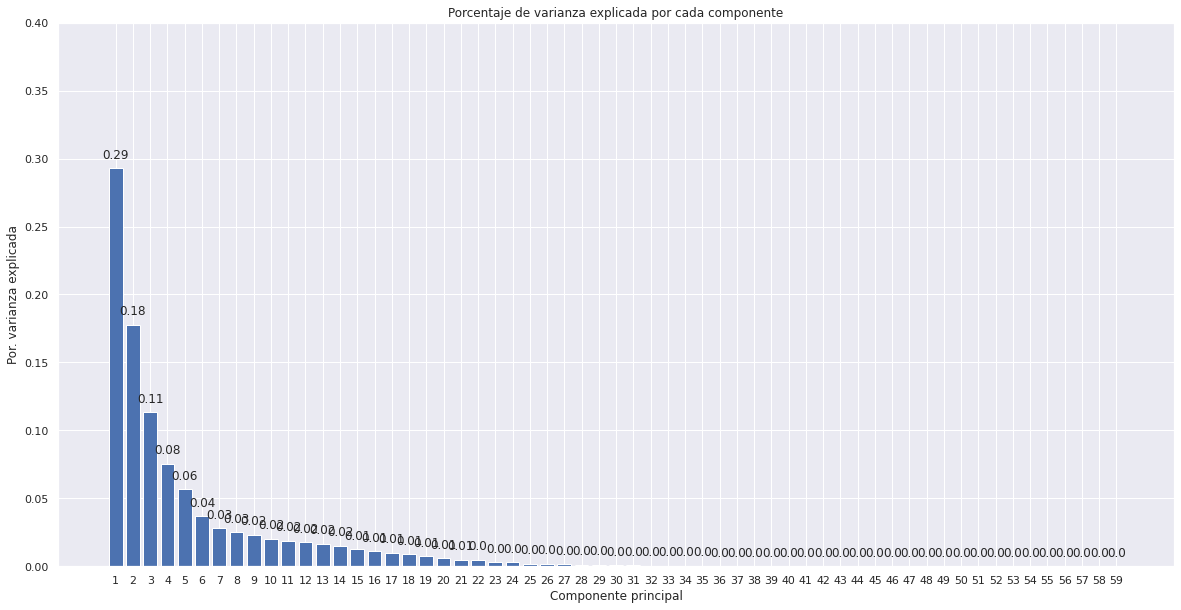

In [ ]:
#Variance percentaje explained for each component

print('----------------------------------------------------')
print('Porcentaje de varianza explicada por cada componente')
print('----------------------------------------------------')
print(model_pca.explained_variance_ratio_)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 10))
ax.bar(
    x      = np.arange(model_pca.n_components_) + 1,
    height = model_pca.explained_variance_ratio_
)

for x, y in zip(np.arange(len(df.columns)) + 1, model_pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(model_pca.n_components_) + 1)
ax.set_ylim(0, 0.4) 
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada');
#Component 1 explains the 34 % of the observed com variance 

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.29276203 0.47044479 0.58396611 0.659346   0.71603098 0.75278619
 0.78071124 0.80572724 0.82879066 0.84893441 0.86773643 0.88525474
 0.90172037 0.91679377 0.92939724 0.9403952  0.95023222 0.9589574
 0.96626404 0.97229879 0.97730107 0.98198033 0.98510731 0.98814092
 0.99005547 0.99187251 0.99350157 0.99457887 0.99561441 0.99645439
 0.99707963 0.99765504 0.99817751 0.99864183 0.9989     0.99909393
 0.99923474 0.99935058 0.99945721 0.99954855 0.99963603 0.99970322
 0.99975295 0.99979232 0.99982392 0.99985319 0.99988119 0.99990448
 0.99992428 0.99994136 0.99995616 0.99996744 0.99997693 0.99998449
 0.99999057 0.99999609 0.99999968 0.9999999  1.        ]


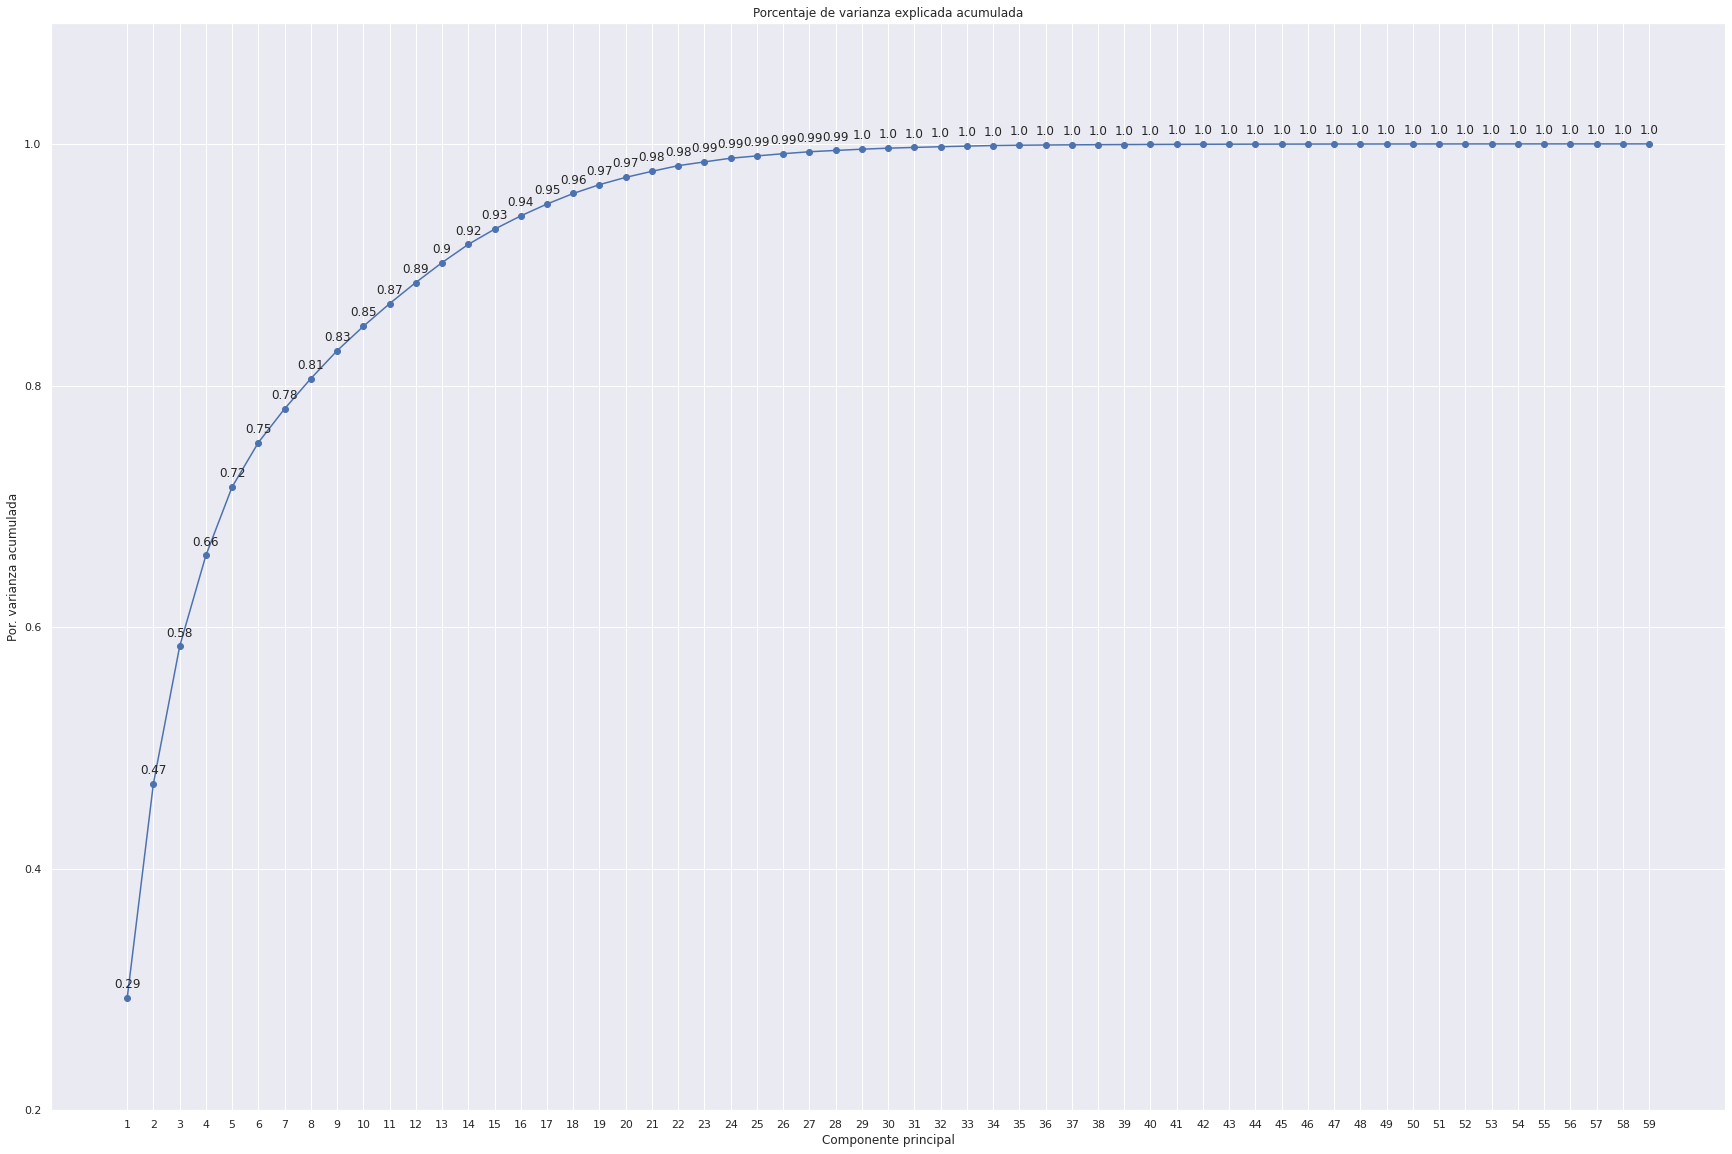

In [ ]:
#Accumulated variance percentaje explained
# ==============================================================================
prop_varianza_acum = model_pca.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(30, 20))
ax.plot(
    np.arange(len(df.columns)) + 1,
    prop_varianza_acum,
    marker = 'o'
)

for x, y in zip(np.arange(len(df.columns)) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
    
ax.set_ylim(0.2, 1.1)
ax.set_xticks(np.arange(model_pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada');
#Components 1 to 23 explains the 99 % of the observed variance

In [ ]:
# Proyección de las observaciones de entrenamiento (reducir la dimensionalidad de nuevas observaciones proyectándolas en el espacio definido por las componentes)

proyecciones = pca_pipe.transform(X=df)
proyecciones = pd.DataFrame(
    proyecciones,
    columns = ['PC0','PC1', 'PC2', 'PC3','PC4', 'PC5', 'PC6','PC7', 'PC8', 'PC9','PC9', 'PC11', 'PC12','PC13', 'PC14', 'PC15','PC16', 'PC17', 'PC18','PC19', 'PC20', 
                'PC21', 'PC22', 'PC23','PC24', 'PC25', 'PC26','PC27', 'PC28', 'PC29','PC30', 'PC31', 'PC32','PC33', 'PC34', 'PC35','P316', 'PC37', 'PC38','PC39', 'PC40',
               'PC41', 'PC42', 'PC43','PC44', 'PC45', 'PC46','PC47', 'PC48','PC49','PC50','PC51', 'PC52', 'PC53','PC54', 'PC55', 'PC56','P557', 'PC58'],
    index   = df.index)
proyecciones.head()

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC9,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,P316,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,PC51,PC52,PC53,PC54,PC55,PC56,P557,PC58
0,10.225009,-3.526598,-2.792940,3.091134,0.635505,-2.458916,0.170827,-1.292652,3.811300,-1.581633,-0.659239,0.978646,-0.724875,0.348579,-0.920974,0.380849,-0.165244,-1.475527,-1.346304,0.988134,-0.037047,2.339573,-0.136214,0.711739,0.795246,-1.615033,-0.806976,-0.852616,0.072298,-0.327126,-0.140816,1.137347,0.060489,-0.750338,0.622088,-0.221678,0.087114,-0.059901,-0.002962,-0.089053,-0.059272,0.050783,0.075221,-0.061348,-0.009698,0.057742,0.032114,-0.023181,0.022649,-0.012668,0.009583,-0.024997,-0.014704,0.007540,-0.018874,-0.005047,-0.000057,0.000576,0.000034
1,10.330415,-3.370529,-2.785845,3.231067,0.814272,-2.619687,-0.315399,-1.376486,-0.361407,-1.021107,-1.763867,1.022070,0.226979,-2.298739,0.184630,0.654037,-1.366295,-0.933647,-1.220821,0.863232,-0.135286,2.241077,-0.138649,0.710437,0.842018,-1.650091,-0.846746,-0.832793,0.045135,-0.319432,-0.115457,1.115029,0.133115,-0.728920,0.626657,-0.223173,0.086171,-0.063389,-0.011568,-0.080967,-0.050181,0.053636,0.080241,-0.058829,-0.006854,0.055694,0.029041,-0.028462,0.022037,-0.011655,0.008801,-0.024113,-0.015280,0.007653,-0.017428,-0.005022,-0.001949,0.000592,0.000103
2,10.432450,-3.409795,-2.746316,3.294348,0.764011,-2.520507,-0.361373,-0.930722,-1.677056,-0.885775,-1.765389,0.895013,0.312203,-1.302281,-0.255395,0.325424,-0.367529,-1.619666,-1.077689,1.015474,-0.180657,2.199871,-0.143852,0.726766,0.830626,-1.649804,-0.842943,-0.837782,0.047251,-0.327756,-0.114311,1.105134,0.121666,-0.728281,0.627071,-0.219847,0.085675,-0.062797,-0.011138,-0.081162,-0.049671,0.052515,0.079320,-0.058899,-0.007520,0.056164,0.028597,-0.028314,0.022261,-0.011041,0.009088,-0.023819,-0.014818,0.007155,-0.017231,-0.004727,-0.001807,0.000619,0.000082
3,10.441032,-3.644303,-2.730895,3.212503,0.510956,-2.223201,-0.016822,-0.085958,0.977419,-0.886628,-0.631445,-0.366882,-0.111535,0.355608,-1.710623,0.421577,-1.042607,-0.533457,-2.070199,0.897737,0.021777,2.573599,-0.158818,0.639037,0.796521,-1.587449,-0.770840,-0.882492,0.067730,-0.324111,-0.143385,1.135335,0.027393,-0.758184,0.624076,-0.220740,0.083910,-0.061958,0.000369,-0.089025,-0.062506,0.047607,0.073445,-0.060353,-0.011952,0.054848,0.032142,-0.020688,0.022543,-0.013417,0.009689,-0.026496,-0.013869,0.007523,-0.019747,-0.005523,0.000431,0.000513,0.000053
4,10.455890,-3.400378,-2.759057,3.287148,0.753519,-2.514691,-0.486433,-0.768423,-1.940878,-0.679390,-1.658798,0.472151,0.287076,-2.498297,-0.683433,-0.145188,-0.299876,-1.637811,-1.111280,1.025892,-0.240656,2.223162,-0.130813,0.705199,0.832690,-1.659063,-0.844245,-0.825235,0.063304,-0.312883,-0.112576,1.109500,0.123416,-0.734485,0.624359,-0.219489,0.085681,-0.059788,-0.013595,-0.082163,-0.049205,0.052310,0.079148,-0.058556,-0.007139,0.056079,0.027432,-0.028335,0.022359,-0.011449,0.008876,-0.024333,-0.015516,0.007184,-0.016662,-0.004724,-0.001935,0.000632,0.000063


In [ ]:
# Recostruccion de las proyecciones (revertir la proyección)

recostruccion = pca_pipe.inverse_transform(proyecciones)
recostruccion = pd.DataFrame(
                    recostruccion,
                    columns = df.columns,
                    index   = df.index
)
print('------------------')
print('Valores reconstruidos')
print('------------------')
display(recostruccion.head())

print('---------------------')
print('Valores originales')
print('---------------------')
display(df.head())

------------------
Valores reconstruidos
------------------


,State_Factor,building_class,facility_type,Year_Factor,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,february_max_temp,march_min_temp,march_avg_temp,march_max_temp,april_min_temp,april_avg_temp,april_max_temp,may_min_temp,may_avg_temp,may_max_temp,june_min_temp,june_avg_temp,june_max_temp,july_min_temp,july_avg_temp,july_max_temp,august_min_temp,august_avg_temp,august_max_temp,september_min_temp,september_avg_temp,september_max_temp,october_min_temp,october_avg_temp,october_max_temp,november_min_temp,november_avg_temp,november_max_temp,december_min_temp,december_avg_temp,december_max_temp,cooling_degree_days,heating_degree_days,precipitation_inches,snowfall_inches,snowdepth_inches,avg_temp,days_below_30F,days_below_20F,days_below_10F,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,site_eui
0,0.000000e+00,3.330669e-16,13.0,1.0,61242.0,1942.0,11.0,2.4,36.0,50.5,68.0,35.0,50.589286,73.0,40.0,53.693548,80.0,41.0,55.5,78.0,46.0,56.854839,84.0,50.0,60.5,90.0,52.0,62.725806,84.0,52.0,62.16129,85.0,52.0,64.65,90.0,47.0,63.016129,83.0,43.0,53.8,72.0,36.0,49.274194,71.0,115.0,2960.0,16.59,7.105427e-15,-1.989520e-13,56.972603,2.842171e-14,-3.552714e-15,0.000000e+00,-2.553513e-15,14.0,1.421085e-14,-4.940492e-15,-1.634977e-16,248.682616
1,3.552714e-15,3.330669e-16,55.0,1.0,274000.0,1955.0,45.0,1.8,36.0,50.5,68.0,35.0,50.589286,73.0,40.0,53.693548,80.0,41.0,55.5,78.0,46.0,56.854839,84.0,50.0,60.5,90.0,52.0,62.725806,84.0,52.0,62.16129,85.0,52.0,64.65,90.0,47.0,63.016129,83.0,43.0,53.8,72.0,36.0,49.274194,71.0,115.0,2960.0,16.59,-3.552714e-15,-1.705303e-13,56.972603,3.552714e-14,-3.552714e-15,-1.776357e-15,-3.885781e-15,14.0,-1.065814e-14,-1.165734e-15,-2.129373e-16,26.500150
2,3.552714e-15,5.551115e-16,48.0,1.0,280025.0,1951.0,97.0,1.8,36.0,50.5,68.0,35.0,50.589286,73.0,40.0,53.693548,80.0,41.0,55.5,78.0,46.0,56.854839,84.0,50.0,60.5,90.0,52.0,62.725806,84.0,52.0,62.16129,85.0,52.0,64.65,90.0,47.0,63.016129,83.0,43.0,53.8,72.0,36.0,49.274194,71.0,115.0,2960.0,16.59,3.552714e-15,-1.136868e-13,56.972603,7.105427e-15,-7.105427e-15,-5.329071e-15,-3.885781e-15,14.0,1.776357e-15,-1.665335e-16,-3.491131e-16,24.693619
3,2.664535e-15,6.661338e-16,6.0,1.0,55325.0,1980.0,46.0,1.8,36.0,50.5,68.0,35.0,50.589286,73.0,40.0,53.693548,80.0,41.0,55.5,78.0,46.0,56.854839,84.0,50.0,60.5,90.0,52.0,62.725806,84.0,52.0,62.16129,85.0,52.0,64.65,90.0,47.0,63.016129,83.0,43.0,53.8,72.0,36.0,49.274194,71.0,115.0,2960.0,16.59,-7.105427e-15,-8.526513e-14,56.972603,1.421085e-14,-7.105427e-15,-8.881784e-16,-3.108624e-15,14.0,-1.776357e-15,-7.216450e-16,-1.765081e-16,48.406926
4,0.000000e+00,1.221245e-15,56.0,1.0,66000.0,1985.0,100.0,2.4,36.0,50.5,68.0,35.0,50.589286,73.0,40.0,53.693548,80.0,41.0,55.5,78.0,46.0,56.854839,84.0,50.0,60.5,90.0,52.0,62.725806,84.0,52.0,62.16129,85.0,52.0,64.65,90.0,47.0,63.016129,83.0,43.0,53.8,72.0,36.0,49.274194,71.0,115.0,2960.0,16.59,0.000000e+00,-2.842171e-14,56.972603,-7.105427e-15,-1.065814e-14,-7.105427e-15,-2.220446e-15,14.0,1.776357e-15,1.776357e-15,-3.178881e-16,3.899395


---------------------
Valores originales
---------------------


,State_Factor,building_class,facility_type,Year_Factor,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,february_max_temp,march_min_temp,march_avg_temp,march_max_temp,april_min_temp,april_avg_temp,april_max_temp,may_min_temp,may_avg_temp,may_max_temp,june_min_temp,june_avg_temp,june_max_temp,july_min_temp,july_avg_temp,july_max_temp,august_min_temp,august_avg_temp,august_max_temp,september_min_temp,september_avg_temp,september_max_temp,october_min_temp,october_avg_temp,october_max_temp,november_min_temp,november_avg_temp,november_max_temp,december_min_temp,december_avg_temp,december_max_temp,cooling_degree_days,heating_degree_days,precipitation_inches,snowfall_inches,snowdepth_inches,avg_temp,days_below_30F,days_below_20F,days_below_10F,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,site_eui
0,0,0,13,1.0,61242.0,1942.0,11.0,2.4,36.0,50.5,68.0,35.0,50.589286,73.0,40.0,53.693548,80.0,41.0,55.5,78.0,46.0,56.854839,84.0,50.0,60.5,90.0,52.0,62.725806,84.0,52.0,62.16129,85.0,52.0,64.65,90.0,47.0,63.016129,83.0,43.0,53.8,72.0,36.0,49.274194,71.0,115.0,2960.0,16.59,0.0,0.0,56.972603,0.0,0.0,0.0,0.0,14.0,0.0,0.0,0.0,248.682615
1,0,0,55,1.0,274000.0,1955.0,45.0,1.8,36.0,50.5,68.0,35.0,50.589286,73.0,40.0,53.693548,80.0,41.0,55.5,78.0,46.0,56.854839,84.0,50.0,60.5,90.0,52.0,62.725806,84.0,52.0,62.16129,85.0,52.0,64.65,90.0,47.0,63.016129,83.0,43.0,53.8,72.0,36.0,49.274194,71.0,115.0,2960.0,16.59,0.0,0.0,56.972603,0.0,0.0,0.0,0.0,14.0,0.0,0.0,0.0,26.500150
2,0,0,48,1.0,280025.0,1951.0,97.0,1.8,36.0,50.5,68.0,35.0,50.589286,73.0,40.0,53.693548,80.0,41.0,55.5,78.0,46.0,56.854839,84.0,50.0,60.5,90.0,52.0,62.725806,84.0,52.0,62.16129,85.0,52.0,64.65,90.0,47.0,63.016129,83.0,43.0,53.8,72.0,36.0,49.274194,71.0,115.0,2960.0,16.59,0.0,0.0,56.972603,0.0,0.0,0.0,0.0,14.0,0.0,0.0,0.0,24.693619
3,0,0,6,1.0,55325.0,1980.0,46.0,1.8,36.0,50.5,68.0,35.0,50.589286,73.0,40.0,53.693548,80.0,41.0,55.5,78.0,46.0,56.854839,84.0,50.0,60.5,90.0,52.0,62.725806,84.0,52.0,62.16129,85.0,52.0,64.65,90.0,47.0,63.016129,83.0,43.0,53.8,72.0,36.0,49.274194,71.0,115.0,2960.0,16.59,0.0,0.0,56.972603,0.0,0.0,0.0,0.0,14.0,0.0,0.0,0.0,48.406926
4,0,0,56,1.0,66000.0,1985.0,100.0,2.4,36.0,50.5,68.0,35.0,50.589286,73.0,40.0,53.693548,80.0,41.0,55.5,78.0,46.0,56.854839,84.0,50.0,60.5,90.0,52.0,62.725806,84.0,52.0,62.16129,85.0,52.0,64.65,90.0,47.0,63.016129,83.0,43.0,53.8,72.0,36.0,49.274194,71.0,115.0,2960.0,16.59,0.0,0.0,56.972603,0.0,0.0,0.0,0.0,14.0,0.0,0.0,0.0,3.899395


In [ ]:
X_pca = recostruccion.drop(['site_eui'], axis= 1)
y_pca = recostruccion['site_eui']

In [ ]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(
    X_pca, y_pca, test_size=0.20)

In [ ]:
#Apply Random Forest Regressor
clf_pca = RandomForestRegressor()

In [ ]:
#fit(X_train_pca,y_train_pca)
clf_pca.fit(X_train_pca,y_train_pca)

RandomForestRegressor()

In [ ]:
predicted_rf_pca = clf_pca.predict(X_test_pca)
predicted_rf_pca

array([53.63347295, 90.73225576, 84.76160414, ..., 84.0526085 ,
       19.40387336, 74.56250223])

In [ ]:
err_pca = mean_squared_error(y_test_pca, predicted_rf_pca, squared=False) 
print("RMSE of validation set: ", err_pca)

RMSE of validation set:  41.92874405694969


3.a)PCA with 23 main features

In [ ]:
# Proyección de 59 a 23 componentes principales
pca_23 = PCA(23)  
projected = pca_23.fit_transform(df)
print(df.shape)
print(projected.shape)

(75757, 59)
(75757, 23)


In [ ]:
recostruccion_2 = pca_23.inverse_transform(projected)
recostruccion_2 = pd.DataFrame(
                    recostruccion,
                    columns = df.columns,
                    index   = df.index)

In [ ]:
X_pca_23 = recostruccion_2.drop(['site_eui'], axis= 1)
y_pca_23 = recostruccion_2['site_eui']

In [ ]:
X_train_pca_23, X_test_pca_23, y_train_pca_23, y_test_pca_23 = train_test_split(
    X_pca_23, y_pca_23, test_size=0.20)

In [ ]:
#Apply Random Forest Regressor
clf_pca_23 = RandomForestRegressor()

In [ ]:
#fit(X_train_pca,y_train_pca)
clf_pca_23.fit(X_train_pca_23,y_train_pca_23)

RandomForestRegressor()

In [ ]:
predicted_rf_pca_23 = clf_pca_23.predict(X_test_pca_23)
predicted_rf_pca_23

array([ 71.22835069, 109.76581766,  74.25592914, ..., 106.28676077,
        31.64326664,  96.23389547])

In [ ]:
err_pca23 = mean_squared_error(y_test_pca_23, predicted_rf_pca_23, squared=False) #RMSE: 0.0355
print("RMSE of validation set: ", err_pca23)

RMSE of validation set:  40.52232982209708


In [ ]:
# Evaluating the Algorithm
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_pca_23, predicted_rf_pca_23))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test_pca_23, predicted_rf_pca_23))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_pca_23, predicted_rf_pca_23)))

Mean Absolute Error: 20.817785964876656
Mean Squared Error: 1642.059214210818
Root Mean Squared Error: 40.52232982209708


# 5 - Modeling

Random Forest Regresor


In [ ]:
X = df.drop(["site_eui"],axis=1)
y= df["site_eui"]

In [ ]:
# Train the mode

forest = RandomForestRegressor(n_estimators = 100)

forest.fit(X,y)

RandomForestRegressor()

In [ ]:
importances = forest.feature_importances_
#
# Sort the feature importance in descending order
#
sorted_indices = np.argsort(importances)[::-1]

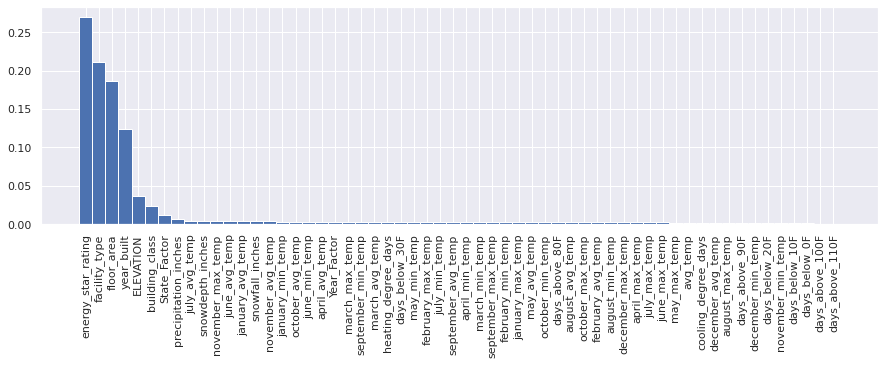

In [ ]:
plt.figure(figsize=(15,4))
plt.bar(range(X.shape[1]), importances[sorted_indices], align='center',width=1)
plt.xticks(range(X.shape[1]), X.columns[sorted_indices], rotation=90)
plt.show()

In [ ]:
#Separation in proportion 80/20 (train/test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30)

In [ ]:
#Define models

# Models name
models_name=['Ridge',
             'Lasso',
             'ElasticNet',
             'RandomForestRegressor',
             'GradientBoostingRegressor',
             'XGBRegressor',
             'svm.SVR',
             'ExtraTreesRegressor',
             'LGBMRegressor',
             'BaggingRegressor',
             'AdaBoostRegressor',
             'CatBoostRegressor',
             ]

In [ ]:
#Define score functions


# evaluate a given model by making predictions on X_valid
def get_v_score(model):
    valid_predictions=model.predict(X_test)
    score=np.sqrt(mean_squared_error(y_test, valid_predictions))
    return score

# evaluate a given model using cross-validation
def get_cv_score(model, X, y):
    cv = KFold(n_splits=5, shuffle=True, random_state=1)
    scores = np.sqrt(-cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=3, n_jobs=1))
    return np.mean(scores)

In [ ]:
# Models
models=[linear_model.Ridge(alpha=.5),
        Lasso(alpha=0.50,tol=0.001),
        ElasticNet(),
        RandomForestRegressor(n_estimators = 100,criterion= 'mse',max_depth= 16,
            max_features = 'auto',oob_score= False,n_jobs = -1,random_state = 123),
        GradientBoostingRegressor(n_estimators = 100,max_depth=16),
        XGBRegressor(n_estimators = 100,max_depth=16),
        svm.SVR(),
        ExtraTreesRegressor(n_estimators=100, n_jobs=4, min_samples_split=25,
                            min_samples_leaf=35),
        LGBMRegressor(),
        BaggingRegressor(n_estimators=100,base_estimator=ExtraTreeRegressor()),
        AdaBoostRegressor(n_estimators=100),
        CatBoostRegressor(iterations=100, depth=16, learning_rate=1, loss_function='RMSE')
        ]

In [ ]:
#Fit and get scores for each model
scores_list=[]
for model in models:
    model.fit(X_train,y_train)
    scores_list.append(get_v_score(model))

[21:49:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0:	learn: 44.9136042	total: 5.1s	remaining: 8m 25s
1:	learn: 41.3452921	total: 10.1s	remaining: 8m 14s
2:	learn: 39.0758996	total: 15.1s	remaining: 8m 6s
3:	learn: 37.6380715	total: 20s	remaining: 8m
4:	learn: 36.5084729	total: 25s	remaining: 7m 54s
5:	learn: 36.2955034	total: 30s	remaining: 7m 49s
6:	learn: 36.0260813	total: 34.9s	remaining: 7m 43s
7:	learn: 34.9690173	total: 39.9s	remaining: 7m 38s
8:	learn: 33.7006749	total: 44.9s	remaining: 7m 33s
9:	learn: 33.2308820	total: 49.8s	remaining: 7m 28s
10:	learn: 32.3164442	total: 54.8s	remaining: 7m 23s
11:	learn: 31.6387069	total: 59.8s	remaining: 7m 18s
12:	learn: 30.9633769	total: 1m 4s	remaining: 7m 13s
13:	learn: 30.1520279	total: 1m 9s	remaining: 7m 8s
14:	learn: 29.6594986	total: 1m 14s	remaining: 7m 3s
15:	learn: 29.1284029	total: 1m 19s	remaining: 6m 58s
16:	learn: 28.7813179	total: 1m 24s	remaining: 

In [ ]:
#Convert list to dataframe
data={'Model':models_name,'RMSE': scores_list}
scores_df=pd.DataFrame(data)
#Sort by valid RMSLE
scores_df.sort_values(by='RMSE').round(5).style.set_properties(**{'background-color': 'black','color': 'white'})

,Model,RMSE
5,XGBRegressor,41.906160
8,LGBMRegressor,42.861070
3,RandomForestRegressor,43.226880
4,GradientBoostingRegressor,43.600290
9,BaggingRegressor,44.592490
7,ExtraTreesRegressor,46.934680
11,CatBoostRegressor,48.688140
1,Lasso,52.391400
0,Ridge,52.408860
2,ElasticNet,52.675290


In [ ]:
model = XGBRegressor(n_estimators = 100,max_depth=16)
model_fitted = model.fit(X_train,y_train)

[22:07:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
dft = dft.drop(columns='site_eui')

KeyError: ignored

In [ ]:
dft.head()

In [ ]:
dft['site_eui']=model.predict(dft)
submission=dft[['site_eui']].reset_index()
submission.to_csv('WiDS_TIM_submission_19.csv', index=False)

In [ ]:
dft

LGBMRegressor

In [ ]:
model_REG = LGBMRegressor()

# train model
model_REG.fit(X_train, y_train)

In [ ]:
# predict on validation set
y_pred = model_REG.predict(X_test)

In [ ]:
err = mean_squared_error(y_test, y_pred, squared=False)  #Sale RMSE: 0.036
print("RMSE of validation set: ", err)

In [ ]:
# Evaluating the Algorithm
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RandomForest *Regressor*

In [ ]:
RF_REG = RandomForestRegressor()

In [ ]:
RF_REG.fit(X_train, y_train)

In [ ]:
y_pred = RF_REG.predict(X_test)

In [ ]:
err = mean_squared_error(y_test, y_pred, squared=False)  #Sale RMSE de 0.036
print("RMSE of validation set: ", err)

Support Vector Regressor

In [ ]:
from sklearn.svm import SVR

In [ ]:
svr = SVR().fit(X_train, y_train)

In [ ]:
y_pred_svr = svr.predict(X_test)

In [ ]:
err = mean_squared_error(y_test, y_pred_svr, squared=False) #RSME:0.061
print("RMSE of validation set: ", err)

Hyperparameter tuning and cross validation

Métodos de ensamblado

In [ ]:
def rmse(y_ver,y_pred):
    return np.sqrt(mean_squared_error(y_ver,y_pred))

def rmse_cv(estimador,X,y):
    pred=estimador.predict(X)
    return rmse(y,pred)

In [ ]:
errores={}

In [ ]:
estimador_elnet=ElasticNet()
errores["ElasticNet"]=cross_val_score(estimador_elnet,
                                        X=df.drop(['site_eui'],axis=1),
                                        y=df["site_eui"],
                                       scoring=rmse_cv,
                                       cv=10).mean()
estimador_Lasso=Lasso()
errores["Lasso"]=cross_val_score(estimador_Lasso,
                                        X=df.drop(['site_eui'],axis=1),
                                        y=df["site_eui"],
                                       scoring=rmse_cv,
                                       cv=10).mean()
estimador_Ridge=Ridge()
errores["Ridge"]=cross_val_score(estimador_Ridge,
                                        X=df.drop(['site_eui'],axis=1),
                                        y=df["site_eui"],
                                       scoring=rmse_cv,
                                       cv=10).mean()

In [ ]:
errores

In [ ]:
estimador_bagging_10=BaggingRegressor()
error_cv=cross_val_score(estimador_bagging_10,
                        X=df.drop(['site_eui'],axis=1),
                        y=df["site_eui"],
                        scoring=rmse_cv,cv=10).mean()
errores["Bagging"]=error_cv

In [ ]:
errores

In [ ]:
estimador_bagging_100=BaggingRegressor(n_estimators=100)  #Tarda 17 minutos
error_cv=cross_val_score(estimador_bagging_100,
                         X=df.drop(['site_eui'],axis=1),
                         y=df["site_eui"],
                        scoring=rmse_cv,cv=10).mean()
errores["Bagging_100"]=error_cv

In [ ]:
errores

In [ ]:
#Tarda 3 minutos
estimador_bagging_extra_tree=BaggingRegressor(n_estimators=100,
                                        base_estimator=ExtraTreeRegressor())
error_cv=cross_val_score(estimador_bagging_extra_tree,
                        X=df.drop(['site_eui'],axis=1),
                        y=df["site_eui"],
                        scoring=rmse_cv,cv=10).mean()
errores["bagging_extra_tree"]=error_cv

In [ ]:
errores

Boosting

In [ ]:
estimador_boosting_Ada=AdaBoostRegressor(n_estimators=100,
                                        )
error_cv=cross_val_score(estimador_boosting_Ada,
                        X=df.drop(['site_eui'],axis=1),
                        y=df["site_eui"],
                        scoring=rmse_cv,cv=10).mean()
errores["boosting_Ada"]=error_cv

In [ ]:
errores

In [ ]:
#Tarda 2 minuto
estimador_boosting_Ada=AdaBoostRegressor(n_estimators=100,loss='exponential',
                                        )
error_cv=cross_val_score(estimador_boosting_Ada,
                        X=df.drop(['site_eui'],axis=1),
                         y=df["site_eui"],
                        scoring=rmse_cv,cv=10,).mean()
errores["boosting_Ada_Exponential"]=error_cv

In [ ]:
errores

Gradient Boosting

In [ ]:
#Tarda un minuto
estimador_gradient_boosting=GradientBoostingRegressor(n_estimators=100,loss='ls',
                                        )
error_cv=cross_val_score(estimador_gradient_boosting,
                        X=df.drop(['site_eui'],axis=1),
                         y=df["site_eui"],
                        scoring=rmse_cv,cv=10,).mean()
errores["gradient_boosting"]=error_cv

In [ ]:
errores

Prediction on test file

In [ ]:
X_test_Es =dft

In [ ]:
predicted_rf_Es = model_REG.predict(X_test_Es)
predicted_rf_Es

In [ ]:
#Guardamos la predicción en formato csv
pd.DataFrame(predicted_rf_Es).to_csv("/content/prediccion.csv",index=True)

In [ ]:
#Guardamos el modelo en formato pickle
pickle.dump(model_REG, open('model.pkl', 'wb'))

CatBoost Regressor

In [ ]:
model = CatBoostRegressor(iterations=2,
                          learning_rate=1,
                          depth=2)

In [ ]:
model.fit(X_train, y_train,
             eval_set=(X_test,y_test),
             use_best_model=True,
             verbose=True)

In [ ]:
print(model.get_all_params())

In [ ]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, model.predict(X_test))))

In [ ]:
preds = model.predict(X_test_Es)

In [ ]:
dft['site_eui'] = preds

In [ ]:
df.tail()

In [ ]:
#Renaming DataFrame columns to avoid spaces in the column labels.
#df_2.rename(columns={"id": "DF_ID"},inplace=True)

In [ ]:
df_2.head()

In [ ]:
df['site_eui'] = model.predict(X_test_Es)

In [ ]:
submission = dft[['site_eui']].reset_index()

In [ ]:
submission

,id,site_eui
0,0.000000,0.127040
1,0.000103,0.051588
2,0.000206,0.276094
3,0.000309,0.127040
4,0.000412,0.127040
...,...,...
9700,0.999588,0.051224
9701,0.999691,0.051224
9702,0.999794,0.051224
9703,0.999897,0.051224


In [ ]:
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9705 entries, 0 to 9704
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        9705 non-null   float64
 1   site_eui  9705 non-null   float64
dtypes: float64(2)
memory usage: 151.8 KB


In [ ]:
submission.astype({'id': 'int32'}).dtypes

id            int32
site_eui    float64
dtype: object

In [ ]:
submission.to_csv('TIM_submission.csv', index = False)

In [ ]:
#Saving prediction in  csv format
pd.DataFrame(preds).to_csv("/content/submission.csv",index=False)

KNNImputer + CatBoost eliminando primero el id y luego volvendo a añadirlo

In [ ]:
df_best = df_2.drop(['id'], axis=1)

In [ ]:
scaler = MinMaxScaler()
df_best = pd.DataFrame(scaler.fit_transform(df_best), columns = df_best.columns)
df_best.head()

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,february_max_temp,march_min_temp,march_avg_temp,march_max_temp,april_min_temp,april_avg_temp,april_max_temp,may_min_temp,may_avg_temp,may_max_temp,june_min_temp,june_avg_temp,june_max_temp,july_min_temp,july_avg_temp,july_max_temp,august_min_temp,august_avg_temp,august_max_temp,september_min_temp,september_avg_temp,september_max_temp,october_min_temp,october_avg_temp,october_max_temp,november_min_temp,november_avg_temp,november_max_temp,december_min_temp,december_avg_temp,december_max_temp,cooling_degree_days,heating_degree_days,precipitation_inches,snowfall_inches,snowdepth_inches,avg_temp,days_below_30F,days_below_20F,days_below_10F,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui
0,0.0,0.0,0.0,0.220339,0.003545,0.989087,0.363636,0.000741,1.0,1.0,0.758621,1.0,1.0,0.583333,1.0,1.0,0.888889,1.0,0.816132,0.53125,1.0,0.726627,0.5,0.846154,0.372131,1.0,0.4375,0.183857,0.315789,0.5,0.148027,0.0,1.0,0.86911,1.0,1.0,1.0,1.0,1.0,1.0,0.625,1.0,1.0,1.0,0.151337,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.130841,0.1,1.0,0.0,0.75,0.818182,0.941176,0.425926,0.337155
1,0.0,0.0,0.0,0.220339,0.002509,0.972718,0.545455,0.054184,1.0,1.0,0.758621,1.0,1.0,0.583333,1.0,1.0,0.888889,1.0,0.816132,0.53125,1.0,0.726627,0.5,0.846154,0.372131,1.0,0.4375,0.183857,0.315789,0.5,0.148027,0.0,1.0,0.86911,1.0,1.0,1.0,1.0,1.0,1.0,0.625,1.0,1.0,1.0,0.151337,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.130841,0.1,1.0,0.0,0.75,0.818182,0.941176,0.425926,0.001615
2,0.0,0.0,0.0,0.220339,0.001600,0.967262,0.000000,0.070723,1.0,1.0,0.758621,1.0,1.0,0.583333,1.0,1.0,0.888889,1.0,0.816132,0.53125,1.0,0.726627,0.5,0.846154,0.372131,1.0,0.4375,0.183857,0.315789,0.5,0.148027,0.0,1.0,0.86911,1.0,1.0,1.0,1.0,1.0,1.0,0.625,1.0,1.0,1.0,0.151337,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.130841,0.1,1.0,0.0,0.75,0.818182,0.941176,0.425926,1.000000
3,0.0,0.0,0.0,0.220339,0.014406,0.977679,0.333333,0.041471,1.0,1.0,0.758621,1.0,1.0,0.583333,1.0,1.0,0.888889,1.0,0.816132,0.53125,1.0,0.726627,0.5,0.846154,0.372131,1.0,0.4375,0.183857,0.315789,0.5,0.148027,0.0,1.0,0.86911,1.0,1.0,1.0,1.0,1.0,1.0,0.625,1.0,1.0,1.0,0.151337,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.130841,0.1,1.0,0.0,0.75,0.818182,0.941176,0.425926,0.337155
4,0.0,0.0,0.0,0.220339,0.008706,0.963294,0.343434,0.000000,1.0,1.0,0.758621,1.0,1.0,0.583333,1.0,1.0,0.888889,1.0,0.816132,0.53125,1.0,0.726627,0.5,0.846154,0.372131,1.0,0.4375,0.183857,0.315789,0.5,0.148027,0.0,1.0,0.86911,1.0,1.0,1.0,1.0,1.0,1.0,0.625,1.0,1.0,1.0,0.151337,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.130841,0.1,1.0,0.0,0.75,0.818182,0.941176,0.425926,0.337155


In [ ]:
#Nan imputation using KKN
imputer_2 = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')

In [ ]:
df_best = pd.DataFrame(imputer_2.fit_transform(df_best),columns = df_best.columns)

In [ ]:
df_best.tail()

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,february_max_temp,march_min_temp,march_avg_temp,march_max_temp,april_min_temp,april_avg_temp,april_max_temp,may_min_temp,may_avg_temp,may_max_temp,june_min_temp,june_avg_temp,june_max_temp,july_min_temp,july_avg_temp,july_max_temp,august_min_temp,august_avg_temp,august_max_temp,september_min_temp,september_avg_temp,september_max_temp,october_min_temp,october_avg_temp,october_max_temp,november_min_temp,november_avg_temp,november_max_temp,december_min_temp,december_avg_temp,december_max_temp,cooling_degree_days,heating_degree_days,precipitation_inches,snowfall_inches,snowdepth_inches,avg_temp,days_below_30F,days_below_20F,days_below_10F,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui
9700,0.0,0.4,1.0,0.016949,0.047254,0.998512,0.989899,1.000000,0.564103,0.482155,0.413793,0.612903,0.389313,0.291667,0.735294,0.503072,0.222222,0.529412,0.419775,0.1875,0.631579,0.521893,0.142857,0.384615,0.344262,0.333333,0.3125,0.317642,0.263158,0.5,0.449533,0.8,0.571429,0.484293,0.125,0.25,0.391266,0.269231,0.518519,0.460692,0.375,0.782609,0.562733,0.421053,0.153294,0.496537,0.223426,0.047337,0.018868,0.531595,0.157407,0.0,0.0,0.0,0.224299,0.05,0.0,0.0,0.000,0.272727,0.20,1.0,0.0
9701,0.0,0.4,1.0,0.016949,0.004557,0.947421,0.939394,0.030486,0.564103,0.482155,0.413793,0.612903,0.389313,0.291667,0.735294,0.503072,0.222222,0.529412,0.419775,0.1875,0.631579,0.521893,0.142857,0.384615,0.344262,0.333333,0.3125,0.317642,0.263158,0.5,0.449533,0.8,0.571429,0.484293,0.125,0.25,0.391266,0.269231,0.518519,0.460692,0.375,0.782609,0.562733,0.421053,0.153294,0.496537,0.223426,0.047337,0.018868,0.531595,0.157407,0.0,0.0,0.0,0.224299,0.05,0.0,0.0,0.375,0.000000,0.00,1.0,0.0
9702,0.0,0.4,1.0,0.016949,0.005736,0.999008,0.939394,1.000000,0.564103,0.482155,0.413793,0.612903,0.389313,0.291667,0.735294,0.503072,0.222222,0.529412,0.419775,0.1875,0.631579,0.521893,0.142857,0.384615,0.344262,0.333333,0.3125,0.317642,0.263158,0.5,0.449533,0.8,0.571429,0.484293,0.125,0.25,0.391266,0.269231,0.518519,0.460692,0.375,0.782609,0.562733,0.421053,0.153294,0.496537,0.223426,0.047337,0.018868,0.531595,0.157407,0.0,0.0,0.0,0.224299,0.05,0.0,0.0,0.000,0.272727,0.20,1.0,0.0
9703,0.0,0.4,1.0,0.016949,0.003054,0.988095,0.787879,1.000000,0.564103,0.482155,0.413793,0.612903,0.389313,0.291667,0.735294,0.503072,0.222222,0.529412,0.419775,0.1875,0.631579,0.521893,0.142857,0.384615,0.344262,0.333333,0.3125,0.317642,0.263158,0.5,0.449533,0.8,0.571429,0.484293,0.125,0.25,0.391266,0.269231,0.518519,0.460692,0.375,0.782609,0.562733,0.421053,0.153294,0.496537,0.223426,0.047337,0.018868,0.531595,0.157407,0.0,0.0,0.0,0.224299,0.05,0.0,0.0,0.000,0.272727,0.20,1.0,0.0
9704,0.0,0.4,1.0,0.016949,0.006248,0.989087,0.868687,0.030486,0.564103,0.482155,0.413793,0.612903,0.389313,0.291667,0.735294,0.503072,0.222222,0.529412,0.419775,0.1875,0.631579,0.521893,0.142857,0.384615,0.344262,0.333333,0.3125,0.317642,0.263158,0.5,0.449533,0.8,0.571429,0.484293,0.125,0.25,0.391266,0.269231,0.518519,0.460692,0.375,0.782609,0.562733,0.421053,0.153294,0.496537,0.223426,0.047337,0.018868,0.531595,0.157407,0.0,0.0,0.0,0.224299,0.05,0.0,0.0,0.300,0.054545,0.04,1.0,0.0


In [ ]:
X_test_best =df_best

In [ ]:
PRED = model.predict(X_test_best)

In [ ]:
df_best['site_eui_2'] = model.predict(X_test_best)

In [ ]:
df_best.head()

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,february_max_temp,march_min_temp,march_avg_temp,march_max_temp,april_min_temp,april_avg_temp,april_max_temp,may_min_temp,may_avg_temp,may_max_temp,june_min_temp,june_avg_temp,june_max_temp,july_min_temp,july_avg_temp,july_max_temp,august_min_temp,august_avg_temp,august_max_temp,september_min_temp,september_avg_temp,september_max_temp,october_min_temp,october_avg_temp,october_max_temp,november_min_temp,november_avg_temp,november_max_temp,december_min_temp,december_avg_temp,december_max_temp,cooling_degree_days,heating_degree_days,precipitation_inches,snowfall_inches,snowdepth_inches,avg_temp,days_below_30F,days_below_20F,days_below_10F,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,site_eui_2
0,0.0,0.0,0.0,0.220339,0.003545,0.989087,0.363636,0.000741,1.0,1.0,0.758621,1.0,1.0,0.583333,1.0,1.0,0.888889,1.0,0.816132,0.53125,1.0,0.726627,0.5,0.846154,0.372131,1.0,0.4375,0.183857,0.315789,0.5,0.148027,0.0,1.0,0.86911,1.0,1.0,1.0,1.0,1.0,1.0,0.625,1.0,1.0,1.0,0.151337,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.130841,0.1,1.0,0.0,0.75,0.818182,0.941176,0.425926,0.337155,0.127040
1,0.0,0.0,0.0,0.220339,0.002509,0.972718,0.545455,0.054184,1.0,1.0,0.758621,1.0,1.0,0.583333,1.0,1.0,0.888889,1.0,0.816132,0.53125,1.0,0.726627,0.5,0.846154,0.372131,1.0,0.4375,0.183857,0.315789,0.5,0.148027,0.0,1.0,0.86911,1.0,1.0,1.0,1.0,1.0,1.0,0.625,1.0,1.0,1.0,0.151337,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.130841,0.1,1.0,0.0,0.75,0.818182,0.941176,0.425926,0.001615,0.051588
2,0.0,0.0,0.0,0.220339,0.001600,0.967262,0.000000,0.070723,1.0,1.0,0.758621,1.0,1.0,0.583333,1.0,1.0,0.888889,1.0,0.816132,0.53125,1.0,0.726627,0.5,0.846154,0.372131,1.0,0.4375,0.183857,0.315789,0.5,0.148027,0.0,1.0,0.86911,1.0,1.0,1.0,1.0,1.0,1.0,0.625,1.0,1.0,1.0,0.151337,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.130841,0.1,1.0,0.0,0.75,0.818182,0.941176,0.425926,1.000000,0.276094
3,0.0,0.0,0.0,0.220339,0.014406,0.977679,0.333333,0.041471,1.0,1.0,0.758621,1.0,1.0,0.583333,1.0,1.0,0.888889,1.0,0.816132,0.53125,1.0,0.726627,0.5,0.846154,0.372131,1.0,0.4375,0.183857,0.315789,0.5,0.148027,0.0,1.0,0.86911,1.0,1.0,1.0,1.0,1.0,1.0,0.625,1.0,1.0,1.0,0.151337,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.130841,0.1,1.0,0.0,0.75,0.818182,0.941176,0.425926,0.337155,0.127040
4,0.0,0.0,0.0,0.220339,0.008706,0.963294,0.343434,0.000000,1.0,1.0,0.758621,1.0,1.0,0.583333,1.0,1.0,0.888889,1.0,0.816132,0.53125,1.0,0.726627,0.5,0.846154,0.372131,1.0,0.4375,0.183857,0.315789,0.5,0.148027,0.0,1.0,0.86911,1.0,1.0,1.0,1.0,1.0,1.0,0.625,1.0,1.0,1.0,0.151337,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.130841,0.1,1.0,0.0,0.75,0.818182,0.941176,0.425926,0.337155,0.127040


In [ ]:
df_2.rename(columns={"id": "DF_ID"},inplace=True)

In [ ]:
data = [df_sub["id"], df_best["site_eui_2"]]
headers = ["id", "site_eui"]
df3 = pd.concat(data, axis=1, keys=headers)

In [ ]:
df3.head()

,id,site_eui
0,75757,0.127040
1,75758,0.051588
2,75759,0.276094
3,75760,0.127040
4,75761,0.127040


In [ ]:
df3.astype({'id': 'int32'}).dtypes

id            int32
site_eui    float64
dtype: object

In [ ]:
df3['id'] = df3['id'].astype(int)

In [ ]:
df3.to_csv('TIM_sub.csv', index = False)

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9705 entries, 0 to 9704
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        9705 non-null   int64  
 1   site_eui  9705 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 151.8 KB
